<a href="https://colab.research.google.com/github/Emersonmiady/previsao-leitos-uti/blob/main/previsao_leitos_uti_sirio_libanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **COVID-19: evitando um possível colapso nos sistemas de saúde**
---
---


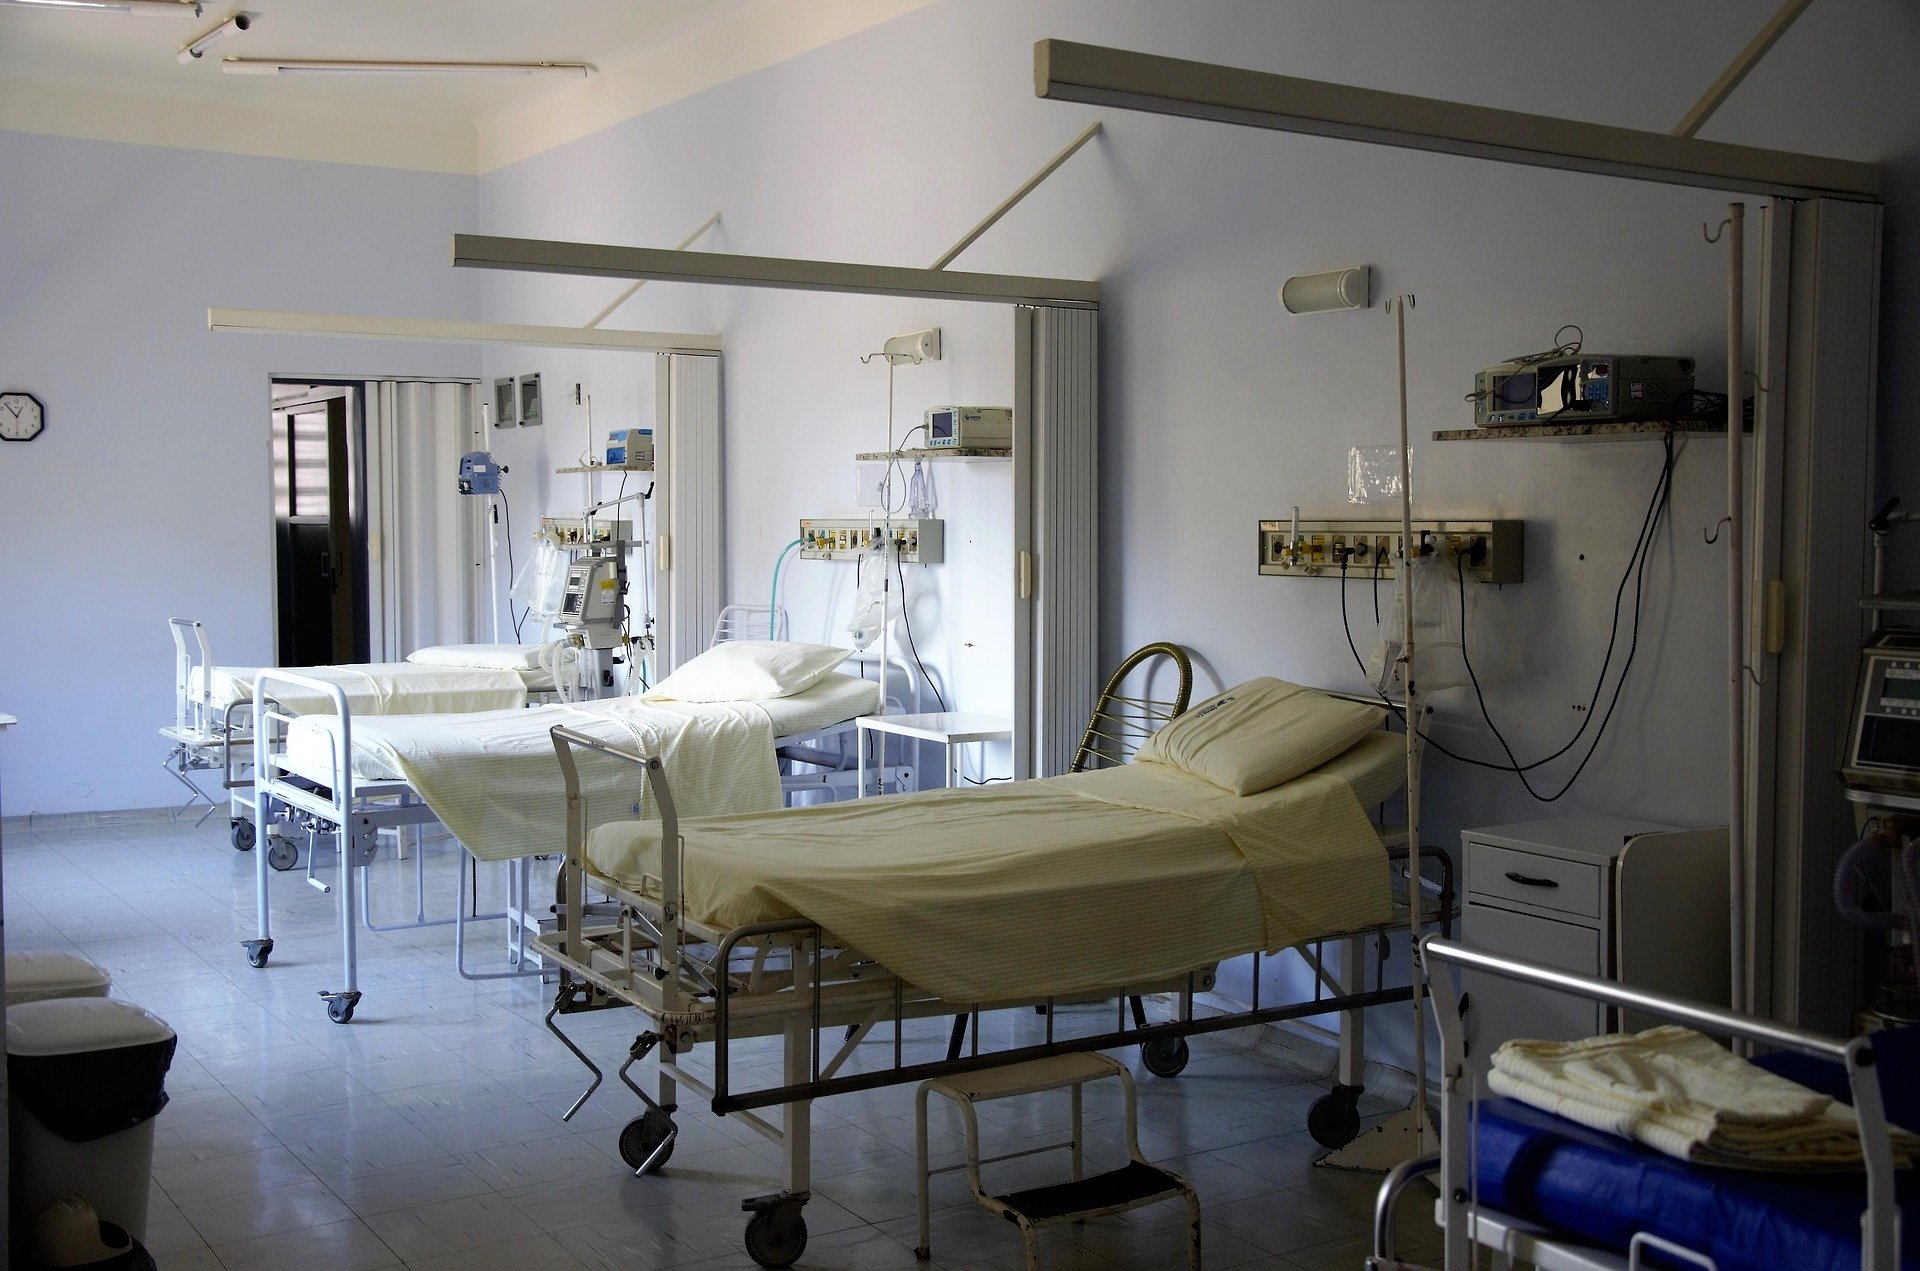

---
**Sobre mim:**
- Autor: Emerson Hideki Miady
- Github: https://github.com/Emersonmiady
- Linkedin: https://www.linkedin.com/in/emerson-miady-a518b318a/

---
## **1. Contextualização**

A pandemia da COVID-19 atingiu o mundo inteiro, sobrecarregando assim os sistemas de saúde, os quais estavam despreparados para uma solicitação tão intensa e demorada de leitos de UTI, profissionais, equipamentos de proteção individual e recursos de saúde.

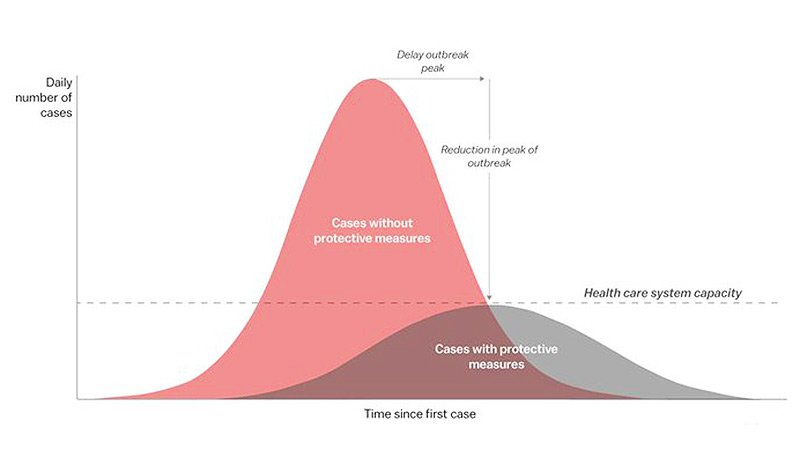

Acima vemos a curva **cinza** sendo o ideal, pois está abaixo da capacidade que o sistema está dispondo. Obviamente que, medidas como:


- **Lavar sempre as mãos**;

- **Passar álcool em gel frequentemente e usar máscaras ao sair de casa**;

- **Se possível, ainda adotar o isolamento social**.

Ajudam muito a reduzir esses aumentos de casos diários, deixando a curva vermelha mais parecida com a situação que queremos. Entretanto, se essas não forem seguidas, teríamos que aumentar a capacidade dos sistemas de saúde, e assim, exigindo verba e tempo até adquirir mais recursos médicos.

Mas o que devemos fazer se a quantidade de leitos ficar estável e não existirem muitos equipamentos sobrando? É aí que nos deparamos com um outro problema, relacionado a **gestão de pessoas que vão para a UTI do próprio hospital:**

- Se encontrarmos uma situação em que todos os leitos estão ocupados, precisamos de **agilidade para evitar um possível superlotamento do espaço**, e além disso, teríamos que **transferir as pessoas para a UTI de outros hospitais**!

- Se determinado hospital estiver com leitos disponíveis, poderíamos contatar os outros locais de saúde para **transferir mais pessoas neste**.

Sendo assim, pensando na **necessidade de ser ágil** para a ida e vinda de pacientes, o Hospital Sírio-Libanês está tentando buscar uma solução para o caso, isto é, **prever se a pessoa precisará de leito antecipadamente**. E é disso que se trata este *notebook*.

**Observação**: O link para a explicação do problema e a disponibilidade do *dataset* estão [aqui](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) (algumas descrições e a imagem foram retiradas de lá).

---
## **2. Objetivos**

Criar um modelo preditivo (***Machine Learning***) que seja capaz de **auxiliar a equipe médica do Hospital Sírio-Libanês**, prevendo as seguintes situações:

**1. Admissão na UTI de casos confirmados de COVID-19;**

**2. NÃO admissão à UTI de casos confirmados de COVID-19.**

Tudo com a finalidade de dizer **antecipadamente** se, a pessoa atendida no hospital precisará de leito na UTI ou não, a partir dos dados de outros pacientes.

Além disso, tenho como objetivo fazer uma **Análise Exploratória** dos dados.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimgsapp2.correiobraziliense.com.br%2Fportlet%2F659%2F60862%2F20190503095254640725i.png&f=1&nofb=1)

Fonte da imagem acima: [Este link](https://www.correiobraziliense.com.br/app/noticia/parceiros/siriolibanes/2019/05/03/noticia-publicidade-siriolibanes,753002/sirio-libanes-amplia-sua-atuacao-em-brasilia.shtml).

---
## **3. Descrição dos Dados**

Este *dataset* contém dados do Hospital Sírio-Libanês, de São Paulo e de Brasília. Todos os dados foram tornados anônimos seguindo as melhores práticas e recomendações internacionais.

Os dados foram limpos e normalizados para caber entre -1 e 1.

### **3.1. Variáveis**

- **`ICU`**: **variável *target***, ou seja, a predição da pessoa se ela vai para a UTI;

- **`WINDOW`**: **intervalo de horas** em que os eventos (resultados dos testes de um determinado paciente) ocorreram a partir da admissão da pessoa no hospital:

  - 0 - 2 horas;
  - 2 - 4 horas;
  - 4 - 6 horas;
  - 6 - 12 horas;
  - Acima de 12 horas.

São 54 recursos no total, sendo:

- **3 Informações demográficas do paciente;**

- **9 Doenças anteriores agrupadas pelo paciente;**

- **36 Resultados de sangue;**

- **6 Sinais vitais.**

E quando pertinentes, eles são expandidos para:

- **`MEAN`** = média;

- **`MEDIAN`** = mediana;

- **`MAX`** = valor máximo;

- **`MIN`** = valor mínimo;

- **`DIFF`** = `MAX` - `MIN`;

- **`DIFF_REL`** = `DIFF` / `MEDIAN`.

### **3.2. Dicas do Sírio-Libanês**

#### **3.2.1. NÃO use os dados com a variável destino presente**



Cuidado para NÃO usar os dados quando a variável de destino estiver presente, pois a ordem do evento é desconhecida (talvez o evento de destino tenha acontecido antes de os resultados serem obtidos). Eles foram mantidos lá para que possamos aumentar este conjunto de dados em outros resultados posteriormente. Sobre essa advertência, vamos entendê-la melhor depois!

- Exemplo 1:

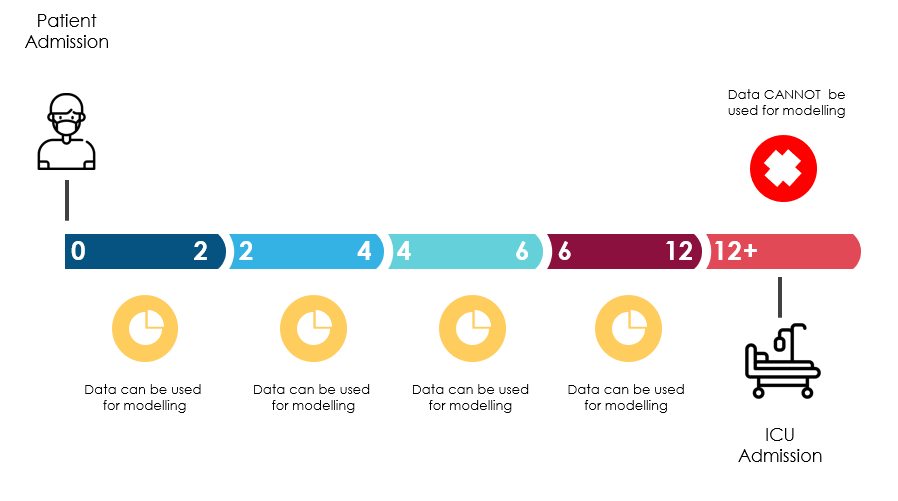

- Exemplo 2:

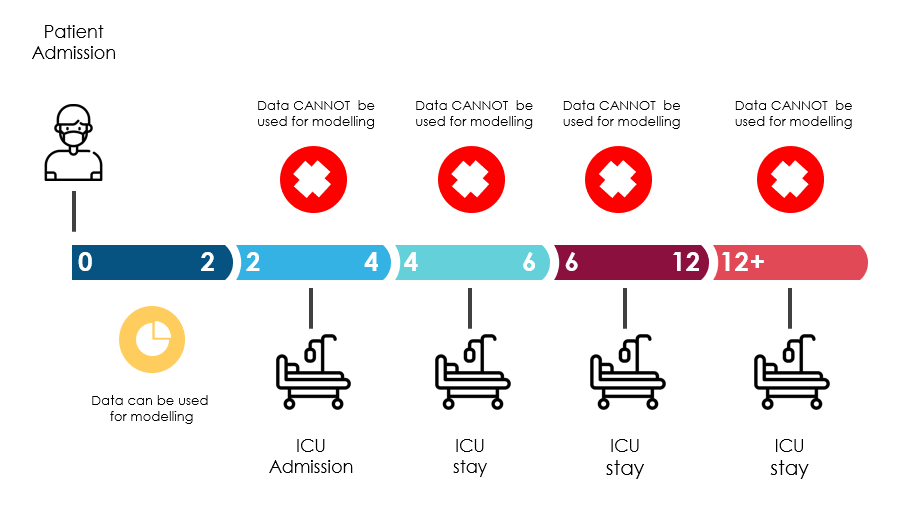

#### **3.2.2. Medição estável entre as janelas**

**Problema:** 

Um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia entre os diferentes tipos de medições. Por exemplo, os sinais vitais são coletados com mais frequência (geralmente de hora em hora) do que os laboratórios de sangue (geralmente diariamente). Portanto, as janelas, muita das vezes, possuem valores nulos...

**Solução:**

É razoável supor que um paciente, que não tenha uma medição registrada em uma janela de tempo, esteja clinicamente estável, podendo apresentar sinais vitais e exames de sangue semelhantes às janelas vizinhas (baixa volatilidade). Portanto, **pode-se preencher os valores ausentes usando a entrada seguinte ou anterior**. Atenção aos problemas de **multicolinearidade** e **variância zero** nesses dados ao escolher seu algoritmo.

#### **3.2.3. Quanto mais cedo, melhor!**

**Problema:**

A identificação precoce dos pacientes que desenvolverão um curso adverso da doença (e precisam de cuidados intensivos) é a chave para um tratamento adequado (salvar vidas) e para gerenciar leitos e recursos.

**Solução:**

Enquanto um modelo preditivo usando todas as janelas de tempo provavelmente produzirá uma maior precisão, **um bom modelo usando apenas a primeira (0-2) provavelmente será clinicamente mais relevante**. A criatividade é muito bem-vinda, sinta-se à vontade com a engenharia de recursos e as janelas de tempo. Atenção às **medidas repetidas em indivíduos**, uma vez que esses valores são (positivamente) correlacionados ao brincar com os dados.

---
## **4. Informações adicionais**

### **4.1. Importação das bibliotecas**

In [ ]:
# Bibliotecas de manipulação e EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Javascript

# Bibliotecas de ML
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import roc_curve

# Biblioteca para salvar o modelo
import pickle

### **4.2. Importação do *dataset* e visão geral**

In [ ]:
# Importando os dados e vendo as 10 primeiras linhas
link = '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 6/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

df = pd.read_excel(link)
df.head(10)

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
0                         0            1  ...       0-2    0
1                         0            1  ...       2-4    0
2                         0            1  ...       4-6    0
3                         0            1  ...      6-12    0
4                         0            1  ...  ABOVE_12    1
5                         1            1  ...       0-2    1
6                         1            1  ...       2-4    1
7                         1            1  ...       4-6    1
8                         1            1  ...      6-12    1
9                         1            1  ...  ABOVE_12    1

[10 rows x 231 columns]

Aqui conseguimos ver como funciona, na prática, a separação do **mesmo paciente** em **janelas (`WINDOW` - penultima variável deste *DataFrame*) distintas**. E caso um paciente tenha `ICU` (última variável) igual a 1 em alguma das janelas, todas a partir desta janela também terão um valor igual.

In [ ]:
# Dimensão do DataFrame
print(f'Esse DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

Esse DataFrame possui 1925 linhas e 231 colunas.


Pois é, existem muitas colunas que nem sabemos o que significam... Sendo assim, um dos trabalhos que precisamos realizar é a redução do número de variáveis, para utilizar os algoritmos de *Machine Learning* com uma **eficiência maior**, além de evitar o ***overfitting*** do modelo.

In [ ]:
# Verificando os tipos das colunas e suas quantidades
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
# Observando a quantidade de pacientes no DataFrame
n_patients = len(df['PATIENT_VISIT_IDENTIFIER'].unique())
print(f'Foram contabilizados {n_patients} pacientes neste DataFrame.')

Foram contabilizados 385 pacientes neste DataFrame.


In [ ]:
# Verificando a quantidade de valores NaN por coluna
df.isna().sum().sort_values(ascending=False)

P02_VENOUS_MIN              1104
HEMOGLOBIN_MEAN             1104
LACTATE_MIN                 1104
LACTATE_MEAN                1104
LACTATE_MEDIAN              1104
                            ... 
AGE_ABOVE65                    0
ICU                            0
GENDER                         0
WINDOW                         0
PATIENT_VISIT_IDENTIFIER       0
Length: 231, dtype: int64

Mais um problema, já citado pelo hospital, é a quantidade de valores faltantes.

Como podemos ver, a quantidade máxima de `NaN`, em uma determinada coluna, é 1104, ou seja, mais da metade das linhas naquela variável... Isso tem que ser preenchido, para não causar problemas com o aprendizado de máquina.

### **4.3. Funções utilizadas**

In [ ]:
def complete_df(df):
  '''
  Esta função basicamente preenche os valores faltantes utilizando métodos de
  "backfill" e "fowardfill", ou seja, todos os NA's que estiverem para trás de 
  determinado valor na coluna, será preenchido com este valor, e o mesmo 
  acontece com os valores para frente deste. 
  
  O retorno é o DataFrame modificado.
  '''
  
  # Separando as colunas contínuas e aplicando o processo de 
  # preenchimento de NA's

  continuous_features_columns = df.iloc[:, 13:-2].columns
  continuous_features = df.groupby('PATIENT_VISIT_IDENTIFIER', 
                                   as_index=False)[continuous_features_columns].fillna(method='bfill').fillna(method='ffill')

  categorical_features = df.iloc[:, :13]

  output = df.iloc[:, -2:]

  # Concatenando tudo em um DataFrame final

  final_data = pd.concat([categorical_features, continuous_features, output], 
                         ignore_index=True, axis=1)
  final_data.columns = df.columns
  return final_data

In [ ]:
def prepare_window(rows):
  '''
  Esta função analisa se, através de um "groupby" dos ID's dos pacientes,
  ou seja, dentre todas as janelas, existe um valor igual a 1 no "ICU".
  Caso exista, então é atribuído um valor igual a 1 em "ICU", quando
  a janela equivale a '0-2'. 
  
  O retorno é a linhas que apresenta a WINDOW igual a '0-2'.
  '''
  if np.any(rows['ICU']):
      rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1
  return rows.loc[rows['WINDOW'] == '0-2']

In [ ]:
def makebio_df(df:pd.DataFrame):
  '''
  Função criada pelo time do Sírio-Libânes para criar novas features e 
  selecionar o que eles consideravam de interessante do ponto de
  vista biológico.

  O retorno da função é o DataFrame com as variáveis mais relevantes pelo Sírio-Libanês.
  '''
  df["BLOODPRESSURE_ARTERIAL_MEAN"] = (df['BLOODPRESSURE_SISTOLIC_MEAN'] + 2*df['BLOODPRESSURE_DIASTOLIC_MEAN'])/3
 
  df["NEUTROPHILES/LINFOCITOS"] = df['NEUTROPHILES_MEAN']/df['LINFOCITOS_MEAN']

  df["GASO"] = df.groupby("PATIENT_VISIT_IDENTIFIER").P02_ARTERIAL_MEAN.apply(lambda x: x.fillna(method='ffill'))
  df["GASO"] = (~df["GASO"].isna()).astype(int)

  # Houve a modificação da função original: Retirei a WINDOW e a 
  # PATIENT_VISIT_IDENTIFIER como retorno, pois estou assumindo que aplicarei
  # esta função após o processo de prè-processamento de dados, na seção 5.
  
  return df[["ICU",
             "AGE_ABOVE65", 
             "GENDER", 
             "BLOODPRESSURE_ARTERIAL_MEAN", 
             "RESPIRATORY_RATE_MAX", 
             "HTN", 
             'DISEASE GROUPING 1',
             'DISEASE GROUPING 2',
             'DISEASE GROUPING 3',
             'DISEASE GROUPING 4',
             'DISEASE GROUPING 5',
             'DISEASE GROUPING 6',
             "GASO",
             "OXYGEN_SATURATION_MIN",
             "HEART_RATE_MAX",
             "PCR_MEAN",
             "CREATININ_MEAN",
             "NEUTROPHILES/LINFOCITOS"]]

In [ ]:
def show_icu_countplot(df):
  '''
  Esta função apenas pega o ICU e vê a contagem de cada valor, 0 ou 1.

  O retorno da função é o plot do gráfico de barras.
  '''
  plt.style.use('seaborn-ticks')
  plt.figure(figsize=(13, 6.5))
  plots = sns.countplot(x='ICU', data=df,
                        palette=['#9bdeac', '#e7305b'])
  for bar in plots.patches:
    plots.annotate(format(bar.get_height()),  
                  (bar.get_x() + bar.get_width() / 2,  
                  bar.get_height() + 1.5), ha='center', va='center', 
                  size=14, xytext=(0, 5), 
                  textcoords='offset points',
                  color='#092532') 
  plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel('\nICU\n', fontsize=14)
  plt.ylabel('\nPatients\n', fontsize=14)
  plt.title(f'\nTotal number of patients by ICU\n', fontsize=16)
  sns.despine()

In [ ]:
def show_hue_countplot(x, df, order=None):
  '''
  Esta função pega uma variável qualitativa do DataFrame e plota um 
  gráfico de contagem, separando em ICU todas as barras.

  O retorno da função é o plot do gráfico de barras.
  '''
  plt.style.use('seaborn-ticks')
  plt.figure(figsize=(14, 7))
  plots = sns.countplot(x=x, data=df, hue='ICU',
                        palette=['#9bdeac', '#e7305b'],
                        order=order)
  for bar in plots.patches:
    plots.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=12, xytext=(0, 5), 
                    textcoords='offset points',
                    color='#092532') 
  plt.legend(['No', 'Yes'], title='ICU?', bbox_to_anchor=(1.13, 0.75), 
             fontsize=12, title_fontsize=12)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel(f'\n{x}\n', fontsize=14)
  plt.ylabel('\nTotal Patients\n', fontsize=14)
  plt.title(f'\nPatients {x} separated by ICU\n', fontsize=16)
  sns.despine()

In [ ]:
def change_xticks_to(values):
  '''
  A entrada é uma lista contendo 2 valores.

  Esta função apenas altera os ticks no eixo x, de "0" - "1" para 
  "value_1" - "value_2", no gráfico de barras.

  O retorno é a alteração no gráfico.
  '''
  plt.xticks([0, 1], [values[0], values[1]], fontsize=12)
  plt.show()

In [ ]:
def show_disease_by_icu_countplot_in_ax(x, df, ax=None):
  '''
  Esta função pega uma determinada doença do DataFrame e plota um 
  gráfico de contagem, separando em ICU todas as barras. Um detalhe é que,
  esta função irá ser usada em subplots, então o parâmetro 
  ax é importante!

  O retorno da função é o plot do gráfico de barras.
  '''
  plt.style.use('seaborn-ticks')
  plots = sns.countplot(x=x, data=df, hue='ICU',
                        palette=['#9bdeac', '#e7305b'], ax=ax)
  for bar in plots.patches:
    plots.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', 
                    va='center', xytext=(0, 5), 
                    textcoords='offset points',
                    color='#092532')
  ax.legend('')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(x)
  ax.set_xticklabels(("Don't have", "Have"))
  sns.despine()

In [ ]:
def melt_df(clean_df):
  '''
  Recebe o DataFrame já no estado limpo e o desmancha. Tudo com o objetivo
  de plotar as variáveis e seus valores no violinplot.

  O retorno da função é o DataFrame desmanchado (melted).
  '''
  clean_df_without_patients_in_index = clean_df.iloc[:, 12:].reset_index()
  vars_to_melt = clean_df.iloc[:, 12:-1].columns

  melted_df = pd.melt(clean_df_without_patients_in_index, 
                      id_vars=['PATIENT_VISIT_IDENTIFIER', 'ICU'], 
                      value_vars=vars_to_melt)
  melted_df['ICU'] = melted_df['ICU'].replace({0: 'No', 1: 'Yes'})

  return melted_df

In [ ]:
def show_hue_violinplot_in_df_melted(df_melted, figsize=(13, 50), order=None):
  '''
  Esta função mostra o violinplot de um DataFrame desmanchado (melted),
  com todas as colunas do Dataset em uma única variável (variable) e todos
  os seus valores também (value). Só avisando que ele vai separar na metade
  os valores de ICU.

  O retorno da função é o plot do gráfico de violino.
  '''  
  display(Javascript('''google.colab.output.setIframeHeight(0, true, 
                                                            {maxHeight: 5000})'''))
  plt.style.use('seaborn-ticks')
  plt.figure(figsize=figsize)
  sns.violinplot(x='value', y='variable', data=df_melted, hue='ICU', 
                palette=['#e7305b', '#9bdeac'], split=True, 
                order=order)
  plt.legend(title='ICU?', fontsize=12, title_fontsize=12)
  plt.title('Blood tests and vital signs variables by ICU\n', fontsize=20)
  sns.despine()

In [ ]:
def stylize_df(df, axis=None):
  '''
  Esta função estiliza o DataFrame com a cor "vlag", de acordo com os
  valores mais próximos de 1 (vermelho) e -1 (azul), em gradiente.

  O retorno é o DataFrame estilizado.
  '''
  style_df = df.style.set_table_attributes("class='dataframe'").background_gradient(cmap='vlag', 
                                                                                    vmin=-1, 
                                                                                    vmax=1,
                                                                                    axis=axis).set_precision(2)
  return style_df

In [ ]:
def describe_with_palette(df):
  '''
  Esta função descreve as variáveis quantitativas com média, mediana
  e desvio padrão, todas comparando o ICU (0 e 1). Além disso,
  pinta os maiores valores com um tom mais avermelhado e os menores com um
  tom azulado.

  O retorno é o DataFrame com as descrições pintadas.
  '''
  wanted_columns = ['mean', '50%', 'std']

  describe_df_icu_0 = df.query('ICU == 0').describe().T[wanted_columns]
  describe_df_icu_0.columns = describe_df_icu_0.columns.map(lambda col : col + '_icu_0')
  describe_df_icu_0 = describe_df_icu_0[:-1]

  describe_df_icu_1 = df.query('ICU == 1').describe().T[wanted_columns]
  describe_df_icu_1.columns = describe_df_icu_1.columns.map(lambda col : col + '_icu_1')
  describe_df_icu_1 = describe_df_icu_1[:-1]

  describe_df = pd.concat([describe_df_icu_0, describe_df_icu_1], axis=1)
  describe_df = describe_df.T.rename({'50%_icu_0' : 'median_icu_0',
                                      '50%_icu_1' : 'median_icu_1'}).sort_index().T

  display(Javascript('''google.colab.output.setIframeHeight(0, true, 
                                                            {maxHeight: 5000})'''))
  
  describe_with_style_1 = stylize_df(describe_df[:16], axis=0)
  describe_with_style_2 = stylize_df(describe_df[16:32], axis=0)
  describe_with_style_3 = stylize_df(describe_df[32:], axis=0)                                                                                                                                                                                       
  
  display(describe_with_style_1)
  print('\n')
  display(describe_with_style_2)
  print('\n')
  display(describe_with_style_3)

In [ ]:
def show_hue_boxplot_in_df_melted(df_melted, figsize=(13, 20), order=None):
  '''
  Esta função mostra o boxplot de um DataFrame desmanchado (melted),
  com todas as colunas do Dataset em uma única variável (variable) e todos
  os seus valores também (value). Só avisando que ele vai separar os 
  valores de ICU.

  O retorno da função é o plot do gráfico de caixas.
  ''' 
  plt.style.use('seaborn-ticks')
  plt.figure(figsize=figsize)
  sns.boxplot(x='variable', y='value', data=df_melted, hue='ICU', 
                palette=['#e7305b', '#9bdeac'], 
                order=order)
  plt.xticks(rotation=90)
  plt.legend(title='ICU?', fontsize=12, title_fontsize=12)
  plt.title('Blood tests and vital signs variables by ICU\n', fontsize=20)
  plt.grid(linestyle='--')

In [ ]:
def show_heatmap(df, size=(13, 13)):
  '''
  Esta função recebe um dataframe com todas as variáveis quantitativas e
  plota o mapa de calor das correlações de Pearson.

  O retorno é o mapa de calor das correlações.
  '''
  plt.figure(figsize=size)
  sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdBu_r', linewidths=0.01,
              linecolor='gray')
  plt.show()

In [ ]:
def give_abs_corr_variables_above(threshold, quantitative_df):
  '''
  Esta função descobre as variáveis de um DataFrame que são 
  correlacionadas entre si, de acordo com um certo limiar:
  
  - São escolhidas as variáveis correlacionadas >= limiar;
  - São escolhidas as variáveis correlacionadas =< (-limiar).

  O retorno é um dicionário com as variáveis que são correlacionadas.
  '''
  all_quantitative_columns = quantitative_df.columns
  corr_df = quantitative_df.corr()

  high_corr_variables = {}

  for column in all_quantitative_columns:
    for i, row in corr_df.iterrows():
      if abs(row[column]) > threshold and row[column] != 1:
        high_corr_variables[column] = i

  return high_corr_variables

In [ ]:
def show_multiple_regplots(dict_vars, size, df, figsize=(16, 8), 
                           title=None):
  '''
  Esta função plota vários regplots do Seaborn (gráficos de regressão),
  recebendo o dicionário com todas as variáveis que serão relacionadas.
  Ela também tem que receber a dimensão que os gráficos serão plotados,
  e o tamanho da figura total, junto com o DataFrame.

  O retorno é o plot desse gráfico com todas as regpots.
  '''
  first_vars = list(dict_vars.keys())
  second_vars = list(dict_vars.values())

  fig, axes = plt.subplots(size[0], size[1], sharex=True, sharey=True,
                           figsize=figsize)
  k = 0
  for i in range(size[0]):
    for j in range(size[1]):
      sns.regplot(x=first_vars[k], y=second_vars[k], 
                  data=df, ax=axes[i, j], scatter_kws = {'alpha': 0.3})
      axes[i, j].set_xlim(-1, 1.2)
      axes[i, j].set_ylim(-1, 1.2)
      axes[i, j].set_xlabel(f'\n{first_vars[k]}\n')
      axes[i, j].set_ylabel(f'\n{second_vars[k]}\n')
      sns.despine()
      k += 1
  fig.suptitle(title, fontsize=20)

In [ ]:
def show_corr_matrix(df):
  '''
  Esta função plota todas as correlações existentes entre as variáveis
  quantitativas do dataframe "quantitative_df". Além disso, pinta os 
  valores de acordo com a função "stylize_df()".

  Ela foi quebrada em vários pedaços para caber na célula do Colab e
  não ficar ruim de ver, com o scroll da célula!

  O retorno são os plots em vários pedações, da matriz de correlação.
  '''
  corr_df = df.corr()
  
  display(stylize_df(corr_df.iloc[:16, :10]))
  print('\n')
  display(stylize_df(corr_df.iloc[:16, 10:20]))
  print('\n')
  display(stylize_df(corr_df.iloc[:16, 20:30]))
  print('\n')
  display(stylize_df(corr_df.iloc[:16, 30:40]))
  print('\n')
  display(stylize_df(corr_df.iloc[:16, 40:]))
  print('\n')

  display(stylize_df(corr_df.iloc[16:32, :10]))
  print('\n')
  display(stylize_df(corr_df.iloc[16:32, 10:20]))
  print('\n')
  display(stylize_df(corr_df.iloc[16:32, 20:30]))
  print('\n')
  display(stylize_df(corr_df.iloc[16:32, 30:40]))
  print('\n')
  display(stylize_df(corr_df.iloc[16:32, 40:]))
  print('\n')

  display(stylize_df(corr_df.iloc[32:, :10]))
  print('\n')
  display(stylize_df(corr_df.iloc[32:, 10:20]))
  print('\n')
  display(stylize_df(corr_df.iloc[32:, 20:30]))
  print('\n')
  display(stylize_df(corr_df.iloc[32:, 30:40]))
  print('\n')
  display(stylize_df(corr_df.iloc[32:, 40:]))

In [ ]:
def remove_corr_var(df, threshold, interval_of_cols=(11, -1)):
  '''
  Esta função pega a matriz de correlação e retira todas as variáveis que 
  possuem correlações acima de um certo "threshold" (limiar).

  O retorno é o DataFrame sem as variáveis que possuem alta correlação
  com alguma outra variável.
  '''

  # Criação da matriz de correlação com valores absolutos
  matrix_corr = df.iloc[:, interval_of_cols[0]:interval_of_cols[1]].corr().abs()

  # Selecionando apenas os valores acima da diagonal principal da matriz
  matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))

  # Pegando as colunas da matriz para excluir (valores maior que o threshold)
  cols_to_exclude = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > threshold)]

  # Printando as variáveis removidas
  print('Foram removidas as seguintes features:')
  print(cols_to_exclude)

  return df.drop(cols_to_exclude, axis=1)

In [ ]:
def transform_df_removing(columns_to_verify, df):
  '''
  Esta função remove, do DataFrame, as colunas com os nomes definidos na
  lista  "columns_to_verify" (caso estas existam), passada como parâmetro.

  O retorno é o DataFrame transformado.
  '''
  df_cols = df.columns
  df_copy = df.copy()

  for col in columns_to_verify:
    if col in df_cols:
      print(f'{col} : Presente no df.')
      df_copy.drop(col, axis=1, inplace=True)
    else:
      print(f'{col} : Não presente no df.')

  print('\nColunas acima já removidas do DataFrame.')

  return df_copy

In [ ]:
def get_cv_model_stats(model, X, y, n_splits, n_repeats, scoring):
  '''
  Esta função faz o cross-validation e separa os resultados do "scoring".

  O retorno é a média e o desvio padrão dos scores.
  '''
  np.random.seed(0)
  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  results = cross_validate(model, X, y, cv=cv, scoring=scoring)

  score_mean = np.mean(results['test_score'])
  score_std = np.std(results['test_score'])

  return score_mean, score_std

In [ ]:
def show_ml_metrics_results(models, X, y, n_splits, n_repeats, scoring):
  '''
  Esta função pega os valores da média e desvio padrão dos scores de 
  determinada métrica (scoring) e coloca a média junto do intervalo de
  confiança em um DataFrame.

  O retorno é o display deste DataFrame.
  '''
  str_models = []
  models_score_mean = []
  models_score_ci_min = []
  models_score_ci_max = []
  ml_stats_df = pd.DataFrame(columns=['Model', 'CI min', 
                                      'Final score (mean)', 'CI max'])

  for model in models:
    score_mean, score_std = get_cv_model_stats(model, X, y, n_splits, 
                                               n_repeats, scoring)
    ci_min = score_mean - 2 * score_std
    ci_max = score_mean + 2 * score_std

    models_score_mean.append(score_mean)
    models_score_ci_min.append(ci_min)
    models_score_ci_max.append(ci_max)
  
  ml_stats_df['CI min'] = models_score_ci_min
  ml_stats_df['Final score (mean)'] = models_score_mean
  ml_stats_df['CI max'] = models_score_ci_max

  for model in models:
    word = []
    for letter in str(model):
      if letter != '(':
        word.append(letter)
      else:
        break
    word = ''.join(word)
    str_models.append(word)

  ml_stats_df['Model'] = str_models
  ml_stats_df.set_index('Model', inplace=True)
  ml_stats_df = ml_stats_df.sort_values('Final score (mean)', 
                                        ascending=False)
  ml_stats_df = ml_stats_df.style.set_table_attributes("class='dataframe'").background_gradient(cmap='Blues', 
                                                                                                axis=0)

  print(f'Score selected: {scoring}')
  display(ml_stats_df)

In [ ]:
def show_barplot(x, y, df, title=None):
  '''
  Esta função plota um barplot estilizado.

  O retorno é o plot do barplot.
  '''
  plt.style.use('seaborn-ticks')
  plt.figure(figsize=(13, 13))
  ax = sns.barplot(x=x, y=y, data=df, palette='Blues_r_d')
  for p in ax.patches:
      ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), 
                                              p.get_y()+p.get_height()/2),
                  xytext=(5, 0), 
                  textcoords='offset points', ha="left", 
                  va="center", color='#092532')
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel(f'\n{x}\n', fontsize=14)
  plt.ylabel(f'\n{y}\n', fontsize=14)
  plt.title(f'\n{title}\n', fontsize=20)
  sns.despine()

---
## **5. Pré-processamento de Dados**

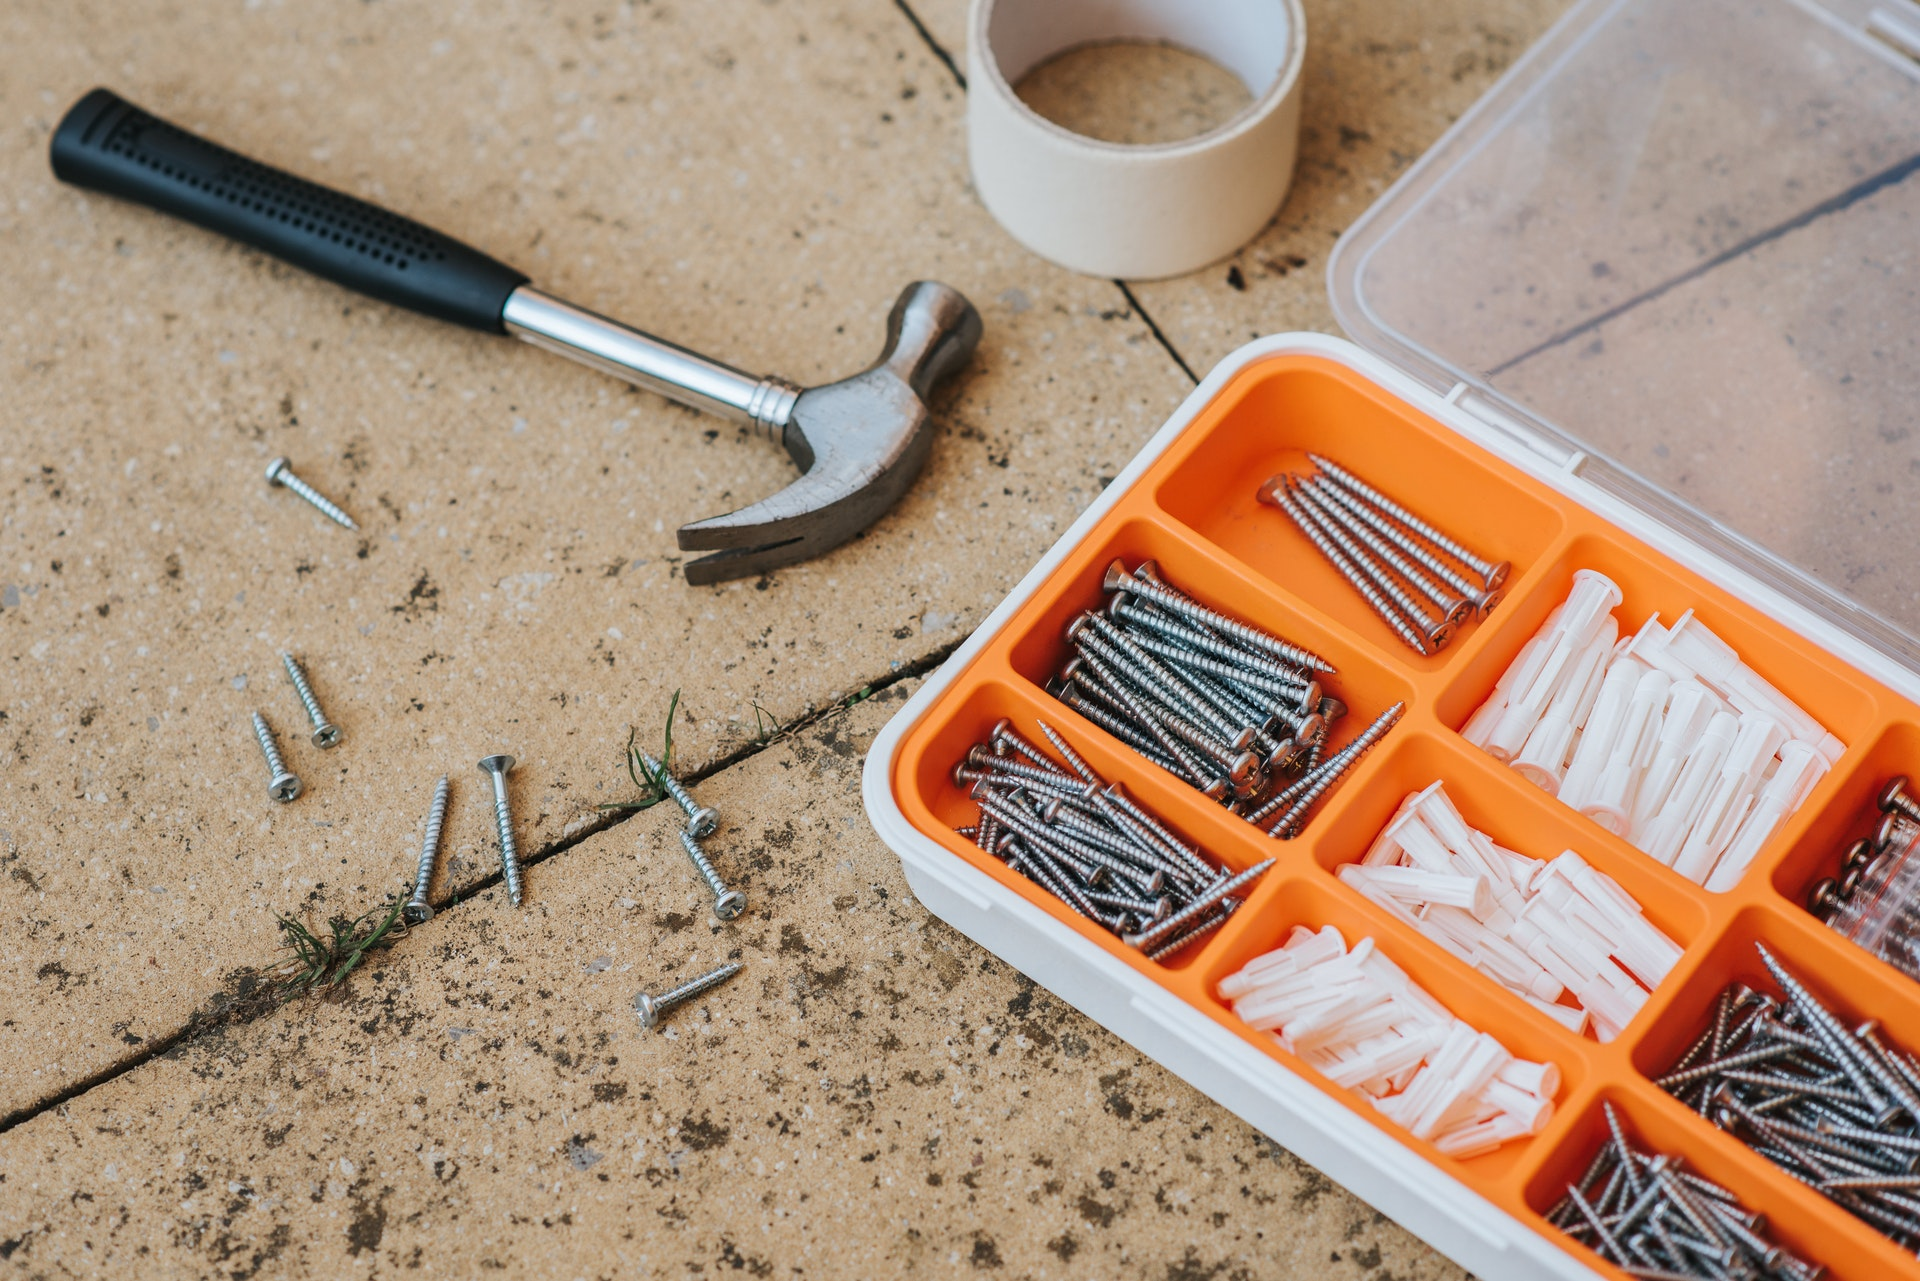

### **5.1. Preenchendo valores faltantes**

Seguindo a dica **3.2.2** do Sírio-Libanês, vou trocar os valores faltantes pelas janelas próximas.

O método consiste em, caso houver um valor "*NaN*", então irá ser preenchido com **o próximo que existir**. Caso não haja próximo, então irá preencher com o **valor anterior existente**. Assim, todas as colunas ficarão preenchidos com algum valor, mesmo que seja repetido de outra janela.

**Observação:** Se quiser entender mais sobre este funcionamento (*backfill* e *fowardfill*), visite o código da função `complete_df` em 4.3.

In [ ]:
clean_df = complete_df(df)
clean_df.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
0                         0            1  ...       0-2    0
1                         0            1  ...       2-4    0
2                         0            1  ...       4-6    0
3                         0            1  ...      6-12    0
4                         0            1  ...  ABOVE_12    1

[5 rows x 231 columns]

### **5.2. Retirando os pacientes que chegam no hospital e vão direto para a UTI**

De acordo com a dica **3.2.1**, não podemos utilizar os dados a partir do momento em que a pessoa apresenta `ICU` igual a 1. Se ela chega ao hospital e já precisa ir para a UTI, ou seja, **`ICU` igual a 1 no momento "0 - 2"**, não conseguimos utilizar os dados desta pessoa em **nenhuma** janela!

Portanto, a idéia é **retirar os dados deste paciente**.

In [ ]:
patients_to_remove = clean_df.query('WINDOW == "0-2" and ICU == 1')['PATIENT_VISIT_IDENTIFIER'].unique()
clean_df = clean_df.query('PATIENT_VISIT_IDENTIFIER not in @patients_to_remove')

In [ ]:
amount_of_removed_patients = len(patients_to_remove)
print(f'Foram removidos {amount_of_removed_patients} pacientes.')

Foram removidos 32 pacientes.


### **5.3. Retirando mais dados faltantes**

Somente existe uma possibilidade de existir mais dados faltantes, em qualquer coluna:

- **Dado um paciente, não foram coletados nenhuma informação daquela determinada variável em nenhuma das janelas**.

In [ ]:
# Vendo se existe algum paciente com dados faltantes em todas as janelas,
# dado uma determinada variável.
display(clean_df[clean_df.isna().any(axis=1)])

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
995                       199            0  ...       0-2    0
996                       199            0  ...       2-4    0
997                       199            0  ...       4-6    0
998                       199            0  ...      6-12    0
999                       199            0  ...  ABOVE_12    0

[5 rows x 231 columns]

Como vemos acima, existe somente um paciente com valores "*NaN*". Sendo assim, é interessante **removê-lo** para os futuros algoritmos!

In [ ]:
# Removendo os dados faltantes que restaram
clean_df = clean_df.dropna()

In [ ]:
# Só para confirmar se ainda existem valores NaN
na_count = clean_df.isna().sum().sum()
print(f'Existem {na_count} valores faltantes.')

Existem 0 valores faltantes.


In [ ]:
n_patients_final = len(clean_df['PATIENT_VISIT_IDENTIFIER'].unique())
print(f'No final, estamos avaliando {n_patients_final} pacientes.')

No final, estamos avaliando 352 pacientes.


### **5.4. Pegando os dados de uma única janela**

Para os modelos de Machine Learning, ficar repetindo o mesmo paciente no modelo, não é interessante... Sendo assim, seguindo a dica **3.2.3**, quanto **mais cedo** a janela que irei pegar, mais relevante são os dados, do ponto de vista clínico.

Logo, dentro de um mesmo paciente, pegarei os dados do momento "**0 - 2**".

**Observação:** mais informações da função `prepare_window` na seção 4.3.

In [ ]:
clean_df = clean_df.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)
clean_df.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ... WINDOW  ICU
PATIENT_VISIT_IDENTIFIER                                            ...            
0                        0                          0            1  ...    0-2    1
2                        10                         2            0  ...    0-2    1
3                        15                         3            0  ...    0-2    0
4                        20                         4            0  ...    0-2    0
5                        25                         5            0  ...    0-2    0

[5 rows x 231 columns]

Aparentemente o index ficou bem estranho, além de que temos a coluna `WINDOW` sem nenhuma informação relevante, pois todos os valores desta coluna são iguais. Vou só remodelá-lo para ser somente a variável `PATIENT_VISIT_IDENTIFIER` e também excluir a `WINDOW`.

In [ ]:
clean_df.set_index('PATIENT_VISIT_IDENTIFIER', inplace=True)
clean_df.drop('WINDOW', axis=1, inplace=True)

In [ ]:
display(clean_df)

AGE_ABOVE65  ... ICU
PATIENT_VISIT_IDENTIFIER               ...    
0                                   1  ...   1
2                                   0  ...   1
3                                   0  ...   0
4                                   0  ...   0
5                                   0  ...   0
...                               ...  ...  ..
380                                 0  ...   1
381                                 1  ...   0
382                                 0  ...   1
383                                 0  ...   0
384                                 0  ...   0

[352 rows x 229 columns]

### **5.5. Resumo**

Concluindo essa etapa de pré-processamento, fizemos então:

- O preenchimento dos valores faltantes;

- A retirada dos pacientes que chegam no hospital e vão direto para a UTI;

- Exclusão dos dados faltantes que restaram;

- Captura dos dados da janela "0 - 2". 

Como resultado, saímos de um DataFrame com 1925 linhas e 231 colunas (apresentando valores "*NaN*") e fomos para um de **352 linhas e 229 colunas** (sem algum valor "*NaN*").

---
## **6. Criando o *Dataset* do Sírio-Libanês**

Por sorte, o Sírio-Libanês disponibilizou para o pessoal do *Bootcamp* de *Data Science* da Alura, uma função com as variáveis que eles consideraram mais importantes para a análise.

O meu objetivo com a criação desse novo conjunto de dados é, no final, **juntar o que eu tenho com o que eles possuem e rodar no algoritmo de *ML***. Sendo assim, criarei o meu próprio *DataFrame* (`my_df`) e o do Sírio (`sirio_df`).

**Observação:** As manipulações do meu *DataFrame* ainda não acabaram, preciso **realizar a análise exploratória e retirar algumas colunas que são altamente correlacionadas entre si**. Após estes processos, poderei finalmente juntá-lo com o *DataFrame* do Sírio.

In [ ]:
my_df = clean_df.copy()
sirio_df = makebio_df(clean_df.copy())

In [ ]:
# Vendo a cara do DataFrame do Sírio
display(sirio_df)

ICU  ...  NEUTROPHILES/LINFOCITOS
PATIENT_VISIT_IDENTIFIER       ...                         
0                           1  ...                 0.949515
2                           1  ...                 0.454450
3                           0  ...                 0.938541
4                           0  ...                 1.267746
5                           0  ...                 2.487410
...                       ...  ...                      ...
380                         1  ...                 0.851571
381                         0  ...                 0.905741
382                         1  ...                 0.894205
383                         0  ...                 1.114293
384                         0  ...                 1.329745

[352 rows x 18 columns]

Os possíveis motivos de algumas variáveis escolhidas são:

- **Pressão arterial:** Se alta, você está com um coração sobrecarregado. Se baixa, você está com problemas de circulação ou uma infeccção exacerbada. O ideal de pressão é de 12 x 8 a 14 x 10 (geralmente);

- **Neutrofilos e linfocitos:** Glóbulos brancos (infecções detectadas em hemograma);

- **Gasometria:** mede o pH e níveis de oxigenio no sangue;

- **Idade acima de 65 anos:** fator de risco por ser idoso;

- **PCR:** medidor de infecção (nesse caso pode ser o positivo ou negativo pro coronavirus);

- **Creatinina:** marcador de alteração renal (entre 0,7 e 1,3mg/dl (homens) e entre 0,6 e 1,2mg/dl (mulheres) -> se está alto, rim comprometido).

**Algumas observações:**
- Uma pessoa com covid vai apresentar neutrofilos e basofilos altos, mostrando um sistema imunológico que tenta combater o vírus (que já positivou no PCR);

- Se você tem um pH alto saindo na gasometria, os rins geralmente vão controlar isso naturalmente, mas se você tem rim comprometido, o pH alto causa acidose metabolica. Então você pede esses exames periodicamente e vai monitorando a função renal da pessoa e os dados da gasometria, pra ver se ela vai precisar de hemodialise. Se o rim está sobrecarregado, vai pra dialise porque nao pode ficar sem filtrar o sangue;

- A explicação do porquê foram selecionadas essas variáveis acima foi copiado do Discord do Bootcamp da Alura, em específico tenho que agradecer a **claricefiorese** que propôs a possível explicação de algumas seleções de *features*;

- Caso queira, para saber mais, dê uma olhada na função `makebio_df` (seção 4.3).

---
## **7. Análise Exploratória de Dados**

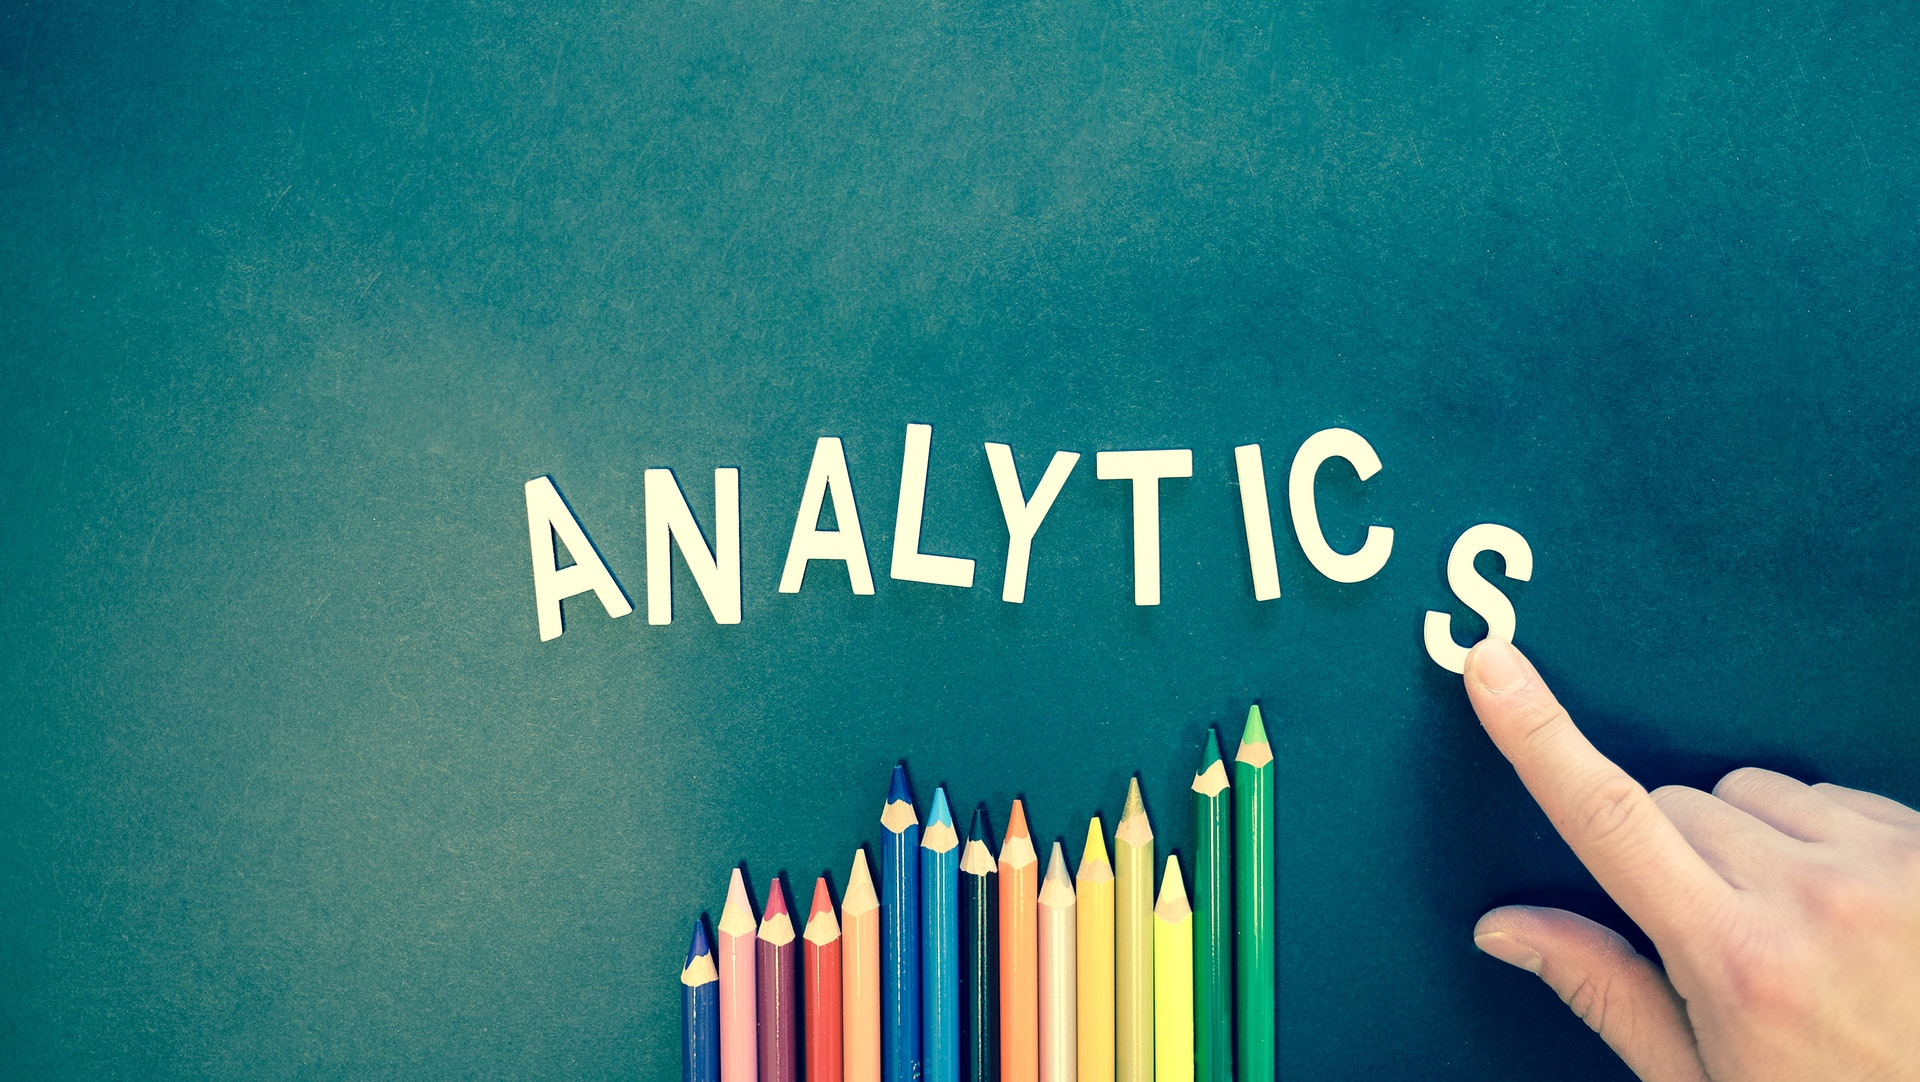

### **7.1. Qual o meu objetivo com a EDA?**

Quero entender como são os pacientes quando eles vão ou não para a UTI, ou seja, **analisarei as variáveis de acordo com a coluna `ICU`**. Então, para começar, nada mais justo que eu saber, simplesmente, a quantidade de pessoas separado por esta variável, em um **gráfico de barras**. 

**Observação:** 

Só quero que entendam a minha incapacidade de gerar informações e conclusões fora do contexto dos dados, pois não tenho quase nada de conhecimento na área da saúde. Portanto, muitas das informações foram focadas em somente apontar o que está acontecendo naquela visualização, sem dizer os possíveis porquês de ocorrer aquilo.

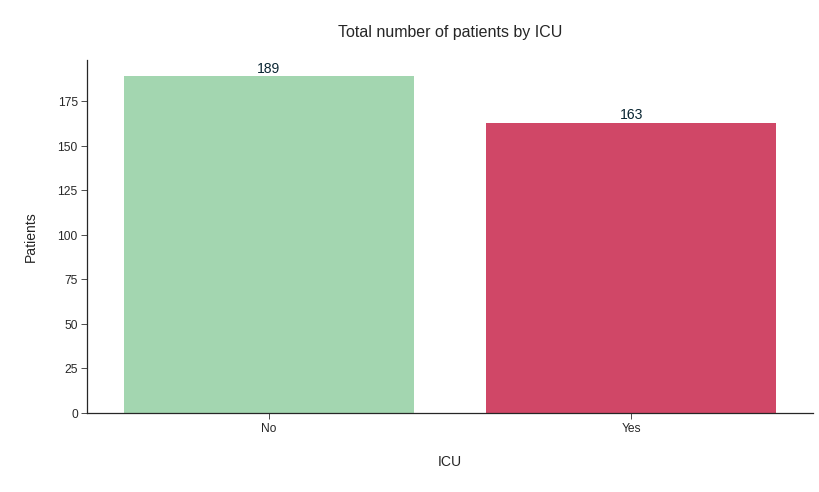

In [ ]:
# Gráfico de barras da quantidade de ICU no DataFrame
show_icu_countplot(my_df)

In [ ]:
# Vendo a porcentagem de ICU
icu_pct = my_df['ICU'].value_counts(normalize=True) * 100
print(f'No nosso DataFrame, temos {round(icu_pct[1], 2)}% que foram para UTI.')

No nosso DataFrame, temos 46.31% que foram para UTI.


Podemos ver que a quantidade de pessoas que vão para a UTI (46,31%) é bem próxima das que não vão. É bom saber disso pois traz um treinamento mais eficaz do nosso futuro modelo (os dados são bem balanceados).

### **7.2. Informações demográficas**

#### **7.2.1. Idade acima de 65**

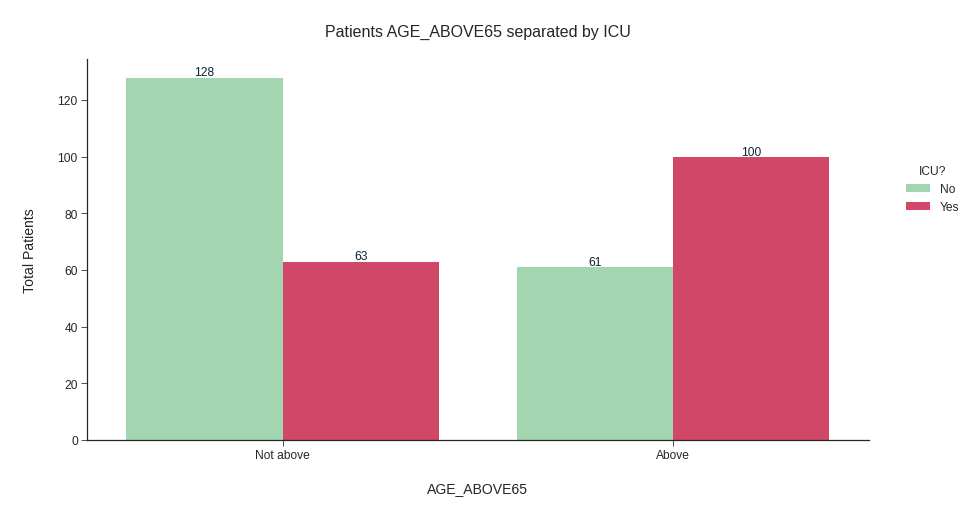

In [ ]:
show_hue_countplot('AGE_ABOVE65', my_df)
change_xticks_to(['Not above', 'Above'])

- Tivemos **mais pacientes abaixo de 65 anos** (191 pessoas) no *Dataset*;

- Das pessoas que são **acima de 65 anos**, existe uma **quantidade maior das que foram para a UTI** (100 pessoas);

- Das pessoas que são **abaixo de 65 anos**, aproximadamente o **dobro não foi para a UTI** (128 pessoas).

Tudo isso bate com a idéia do grupo de risco da COVID-19. Vamos ver como são distribuídos estes números aprofundando um pouco mais, agora de acordo com a idade percentil.

#### **7.2.2. Idade percentil**

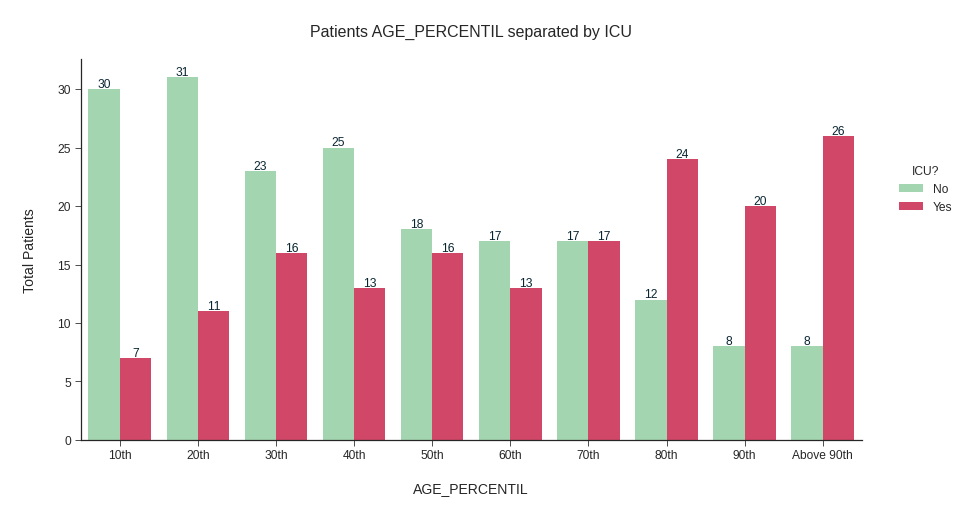

In [ ]:
age_percentil_sorted = sorted(my_df['AGE_PERCENTIL'].unique())
show_hue_countplot('AGE_PERCENTIL', my_df, order=age_percentil_sorted)

- O **maior número de pacientes** que foram para o hospital estão em um **percentil de 20 anos** (42 pessoas);

- Pode-se notar uma **tendência crescente no número de ocorrências de UTI, conforme se aumenta a idade**;

- Da mesma forma o oposto acontece, ou seja, a **tendência é decrescente no número de pessoas que não foram para a UTI, conforme se aumenta a idade**.

#### **7.2.3. Gênero**

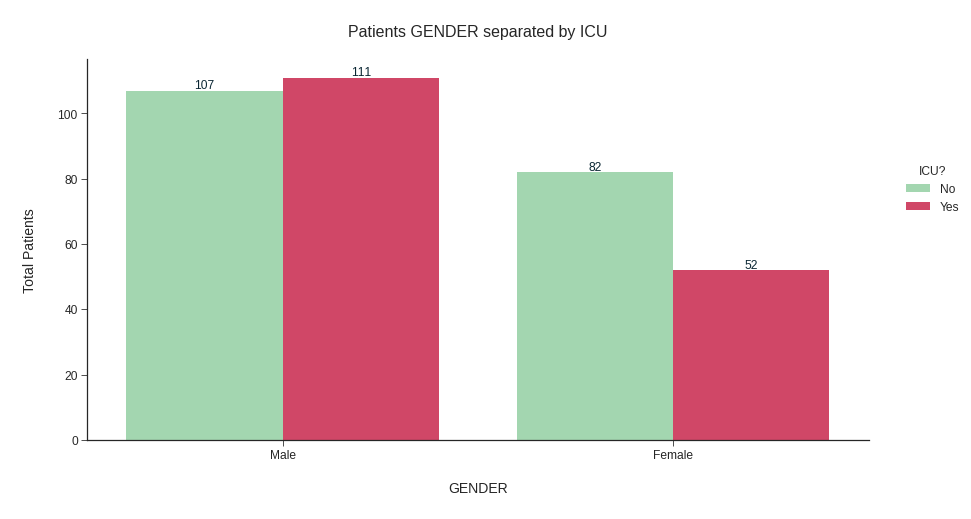

In [ ]:
show_hue_countplot('GENDER', my_df)
change_xticks_to(['Male', 'Female'])

- Existem **muito mais homens hospitalizados** no *Dataset* (218 homens e 114 mulheres, quase o dobro);

- Tivemos **mais homens sendo internados na UTI** (111 pessoas), **comparado com as mulheres** (52 pessoas);

- **Dos homens, temos pouca diferença entre os que vão para a UTI ou não, são quantidades praticamente iguais**;

- **Das mulheres, podemos notar que uma quantidade maior de pessoas não foram para a UTI** (82 pessoas).

### **7.3. Conjunto de Doenças**

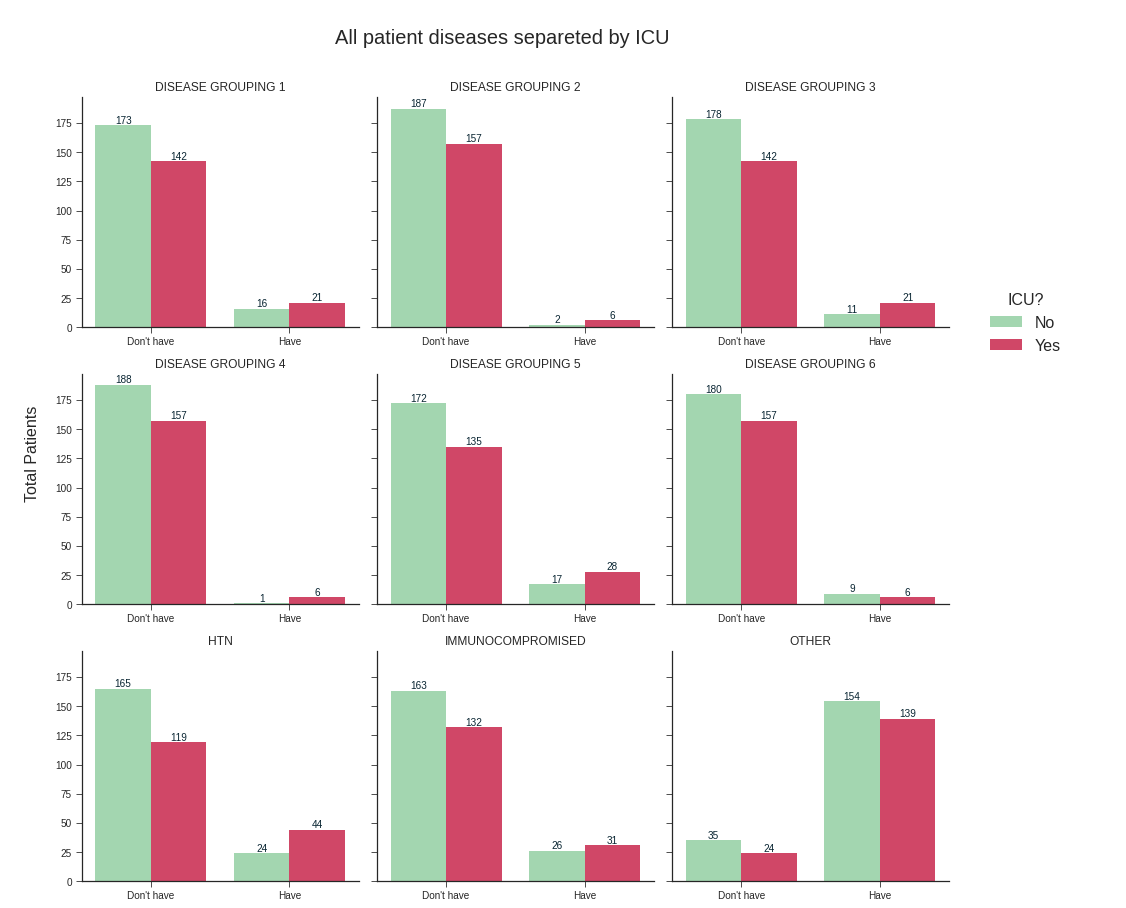

In [ ]:
# Definindo as colunas das variáveis de doenças
diseases = my_df.iloc[:, 3:12].columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12.5, 12.5), 
                         sharey=True, constrained_layout=True)

# Colocando as indexações para os subplots, loop dentro de loop
count_disease = 0
for i in range(3):
  for j in range(3):
    show_disease_by_icu_countplot_in_ax(diseases[count_disease],
                                        my_df, ax=axes[i][j])
    count_disease += 1

# Colocando informações da figura inteira
fig.legend(['No', 'Yes'], title='ICU?', bbox_to_anchor=(1.195, 0.7),
           fontsize=16, title_fontsize=16)
fig.text(-0.05, 0.5, '\nTotal Patients', va='center', rotation='vertical',
         fontsize=16)
fig.suptitle('\nAll patient diseases separeted by ICU\n', fontsize=20)
plt.show()

- **Em quase todas as visualizações de doença, a maioria das pessoas não as tiveram, com excessão de `OTHER`**;

- **Dos que tiveram as doenças, em quase todos os gráficos tivemos um maior número de pacientes indo para a UTI, apenas não aconteceu em `DISEASE GROUPING 6` e `OTHER**`;

- **Quando a pessoa estava com determinada doença, a `HTN` (depois de `OTHER`) foi a que teve mais casos de UTI, totalizando 44 pacientes**.

### **7.4. Resultados de Sangue e Sinais Vitais**

#### **7.4.1. Visualização de todas as variáveis**

Olhando novamente para o nosso *DataFrame*, parecia que as variáveis da `ALBUMIN` (primeira quantitativa) eram todas iguais, incluindo a `MEDIAN`, `MEAN`, `MIN`  e `MAX`... Será que isso ocorre para as outras também?

A minha maior preocupação não é agora na EDA, mas sim quando formos rodar nossos algoritmos, eles vão ficar viciados por valores que são muito parecidos (alta correlação), ou até idênticos. Isso é extremamente ruim!

In [ ]:
# Mostrando novamente o meu DataFrame para olhar os valores quantitativos
display(my_df)

AGE_ABOVE65  ... ICU
PATIENT_VISIT_IDENTIFIER               ...    
0                                   1  ...   1
2                                   0  ...   1
3                                   0  ...   0
4                                   0  ...   0
5                                   0  ...   0
...                               ...  ...  ..
380                                 0  ...   1
381                                 1  ...   0
382                                 0  ...   1
383                                 0  ...   0
384                                 0  ...   0

[352 rows x 229 columns]

Além disso, o problema para analisar essas variáveis, é que são **MUITAS**!

Bom, um modo bem mais rápido e generalista, é utilizando **gráficos de violino**. Neste, conseguimos ter uma idéia da dispersão das variáveis, e como ele pode ser **dividido na metade** em ICU = 0 e ICU = 1, é bem mais compacto que o *boxplot* por exemplo.

Vamos ver como são todas as nossas informações de sangue e sinais vitais.

**Observações:** 

- O *violinplot*, ou gráfico de violino, é uma visualização em que estima a densidade de uma determinada variável quantitativa. Bem parecido com o Histograma, porém em um formato mais "abrangente", por meio de uma curva.

- **O gráfico seguinte, mostra muitas informações e poderá ser bem confuso, mas a idéia principal é ter uma visão geral da dispersão das variáveis nos casos de `MEAN`, `MEDIAN`, `MIN`, `MAX`, `DIFF` e `DIFF_REL`.**

In [ ]:
# Criando um DataFrame desmanchado (melt), com todas as variáveis
# quantitativas em uma única coluna, e seus valores em uma outra.
# Reelembrando que não podemos desmembrar o ICU, pois é nossa 
# característica de interesse, para comparação!

blood_vital_signs_df = melt_df(my_df)
blood_vital_signs_df.head()

PATIENT_VISIT_IDENTIFIER  ICU        variable     value
0                         0  Yes  ALBUMIN_MEDIAN  0.605263
1                         2  Yes  ALBUMIN_MEDIAN  0.605263
2                         3   No  ALBUMIN_MEDIAN -0.263158
3                         4   No  ALBUMIN_MEDIAN  0.605263
4                         5   No  ALBUMIN_MEDIAN  0.605263

<IPython.core.display.Javascript object>

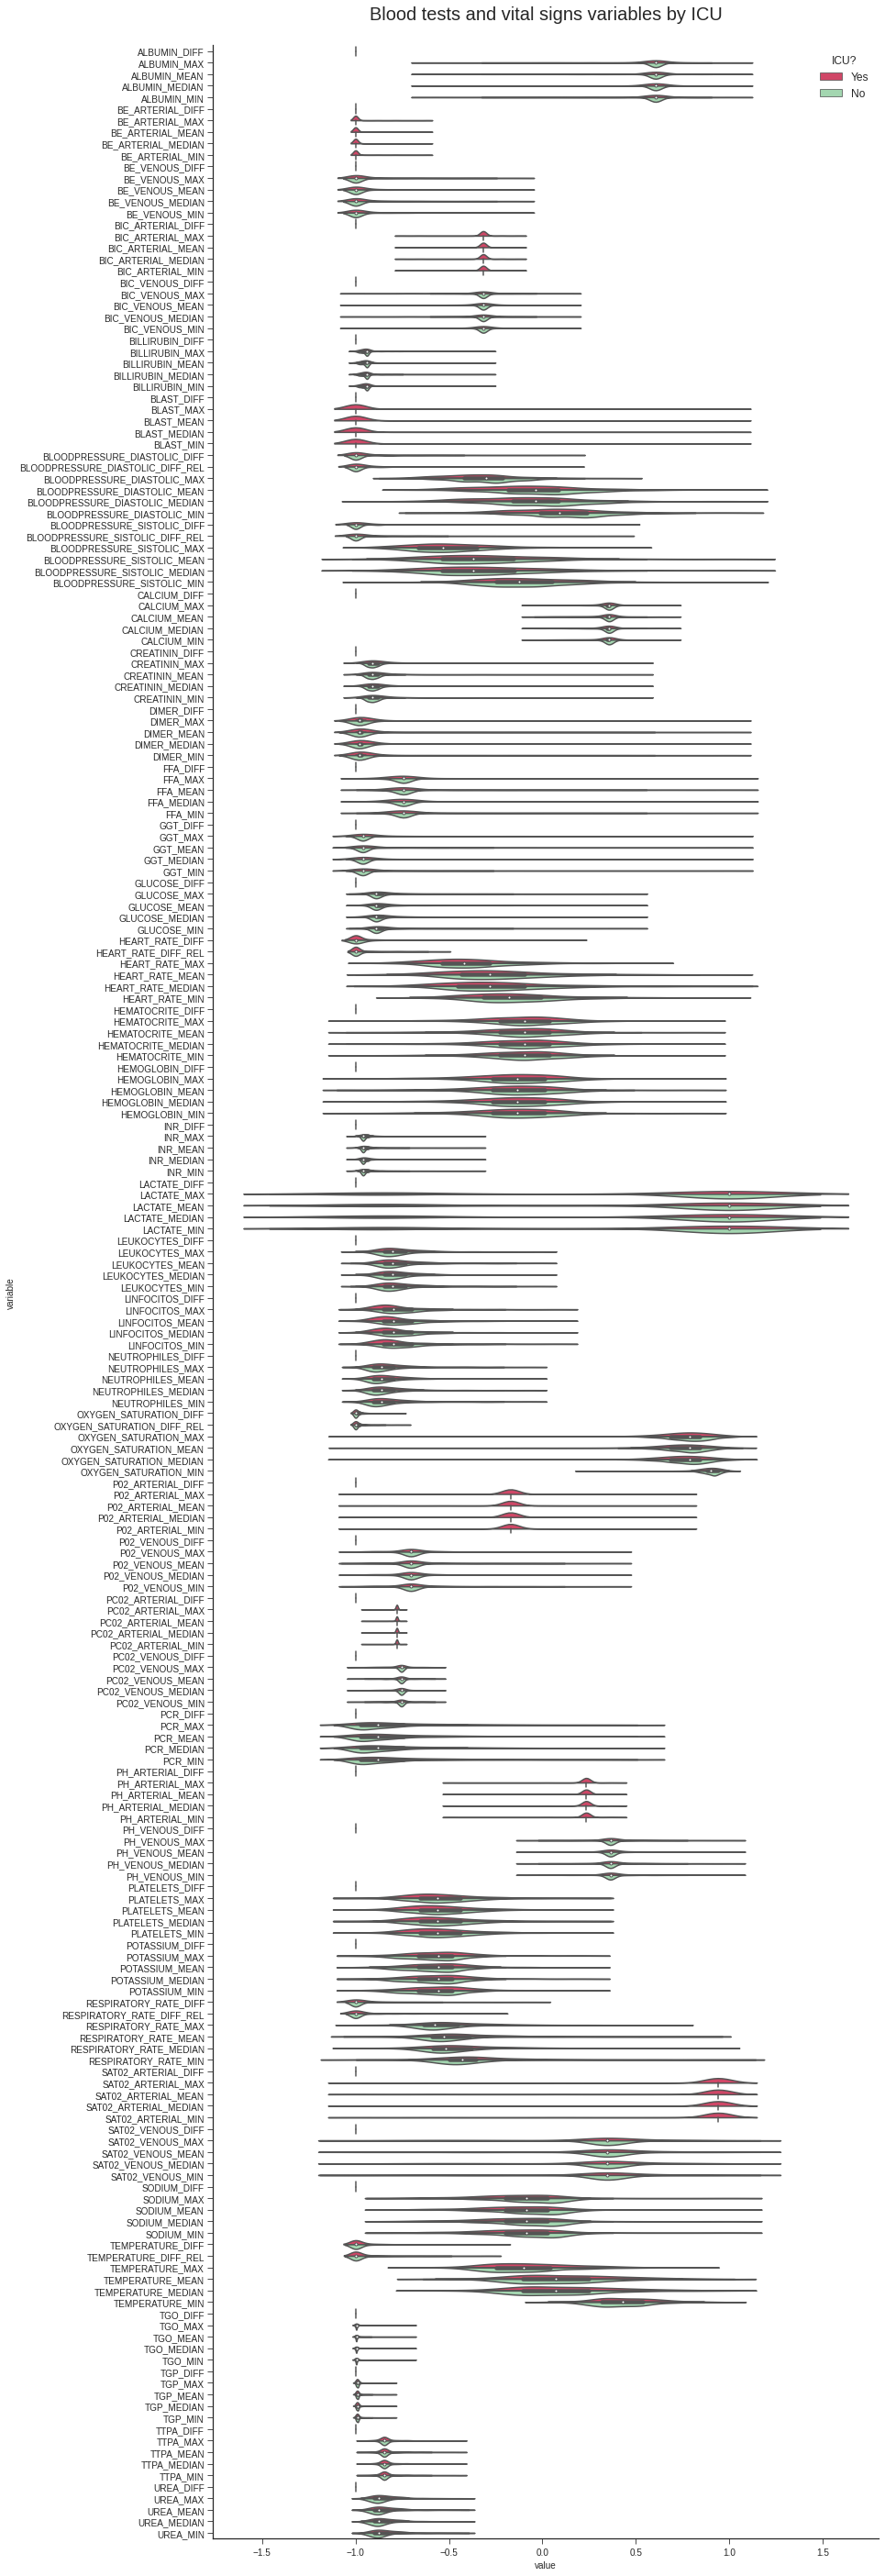

In [ ]:
# Sorteando por ordem alfabética para deixar todas do mesmo tipo juntas,
# como por exemplo, "ALBUMIN_X", com o X variando entre todas as medidas
# já mencionadas.

blood_vital_signs_df_var_sorted = sorted(blood_vital_signs_df['variable'].unique())

show_hue_violinplot_in_df_melted(blood_vital_signs_df, 
                                 order=blood_vital_signs_df_var_sorted)

Eu sei, esse gráfico não ficou bom, pois está muito cumprido e não conseguimos olhar os valores do eixo X. Entretanto, é possível retirar informações dele:

- Comprovamos nossa hipótese, as diferentes medidas para a mesma variáveis são **MUITO parecidas**, salvo excessões como a `TEMPERATURE`, `HEART_RATE`, `BLOOD_PREASSURE_SISTOLIC` e `BLOOD_PREASSURE_DIASTOLIC`;

- Existem variáveis que possuem somente 1 único valor, e quase sempre acontece na medida `DIFF`.

Essas informações são bem úteis, pois precisamos **limpar** ainda mais o nosso *Dataset*!

**Solução:**

Excluir as colunas com `MIN`, `MAX`, `MEDIAN` e `DIFF`, deixando apenas aquelas com `MEAN` e `DIFF_REL`. Mas por quê?

- Estou pegando apenas **uma** das medidas para resumir determinada variável, e essa é de tendência central, a **média**. Não selecionei a mediana pois ela é utilizada no denominador da `DIFF_REL`, daí achei que, de alguma forma, esta poderia carregar a mediana como informação;

- Olhando para todas as `DIFF_REL`'s, nenhuma possui valores únicos, como a `DIFF`. Se eu excluir essa variável, podemos estar perdendo informação...

#### **7.4.2. Retirando colunas parecidas ou com valores únicos**

In [ ]:
# Variável para comparar a quantidade de colunas anterior com a posterior
old_number_of_cols = clean_df.shape[1]

# Criação do novo DataFrame e as terminações não desejadas
clean_df_mean = clean_df.copy()
terminations = ['MIN', 'MAX', 'MEDIAN', 'DIFF']

In [ ]:
# Selecionando as colunas
columns_to_exclude = []
all_columns = clean_df_mean.columns

for term in terminations:
  for col in all_columns:
    if col.endswith(term):
      columns_to_exclude.append(col)

# Dropando as variáveis não desejadas
clean_df_mean.drop(columns_to_exclude, axis=1, inplace=True)

In [ ]:
actual_number_of_cols = clean_df_mean.shape[1]
number_of_removed_cols = old_number_of_cols - actual_number_of_cols
clean_df_mean.head()

AGE_ABOVE65  ... ICU
PATIENT_VISIT_IDENTIFIER               ...    
0                                   1  ...   1
2                                   0  ...   1
3                                   0  ...   0
4                                   0  ...   0
5                                   0  ...   0

[5 rows x 61 columns]

In [ ]:
print(f'Foram removidas {number_of_removed_cols} colunas.')
print(f'Agora, estamos com {actual_number_of_cols} colunas em nosso DataFrame.')

Foram removidas 168 colunas.
Agora, estamos com 61 colunas em nosso DataFrame.


#### **7.4.3. Média, mediana e desvio padrão**

O meu intuito nesta seção é ver o quanto as medidas de tendência central e o desvio padrão de todas as variáveis se alteram, comparando também o `ICU`. Ficará mais claro ao ver as figuras abaixo.

In [ ]:
quantitative_df_with_icu = clean_df_mean.iloc[:, 12:]
describe_with_palette(quantitative_df_with_icu)

<IPython.core.display.Javascript object>

Pode parecer bem confuso as tabelas coloridas, mas na verdade, coloquei uma cor para saber se os números se alteram muito. Ou seja:

- Variáveis com um **"padrão mais xadrez"** de cores, nas 4 primeiras colunas, **podem indicar que existe uma certa diferença quando comparamos o `ICU` (0 e 1)**, dado que a média e/ou mediana mudam comparando esses dois casos. Por exemplo as variáveis:

  - `OXYGEN_SATURATION_MEAN`;

  - `TEMPERATURE_MEAN`;

  - `RESPIRATORY_RATE_MEAN`;

  - `BLOODPRESSURE_SISTOLIC_MEAN`;
  
  - `PCR_MEAN`;

  - `NEUTROPHILES_MEAN`;

  - `LINFOCITOS_MEAN`;

  - `LEUKOCYTES_MEAN`.

- Já aquelas que possuem um **padrão de cores mais uniforme**, **não devem apresentar grandes diferenças ao comparar o `ICU`**. Eis alguns exemplos de variáveis:

  - `OXYGEN_SATURATION_DIFF_REL`;

  - `TGO_MEAN`;

  - `BE_ARTERIAL_MEAN`;

  - `BILLIRUBIN_MEAN`.

- É importante olharmos para o desvio padrão também, pois quanto **maior seus valores, maior é a dispersão dos dados daquela característica**. E também, **quanto maior a diferença na coloração, entre a 5ª e a 6ª coluna, pode dar indícios de certas diferenças daquela variável, quando se compara o `ICU`**. Exemplos:

  - `OXYGEN_SATURATION_MEAN`;

  - `SAT02_VENOUS_MEAN`;

  - `SAT02_ARTERIAL_MEAN`;

  - `LACTATE_MEAN`.

#### **7.4.4. Vendo os boxplots das variáveis restantes**

Agora que temos as nossas variáveis mais "resumidas" (quantidade bem menor delas), podemos ver as diferenças nos ***boxplots***, estes sendo um pouco mais informativo (comparado com os *violinplots*).

**Observação:** O gráfico de *boxplot* possui a forma de caixa que é muito utilizada para uma análise gráfica do conjunto de dados. Ele fornece algumas informações, tais como: distribuição dos dados, simetria e detecção de candidatos a outliers.

<center>

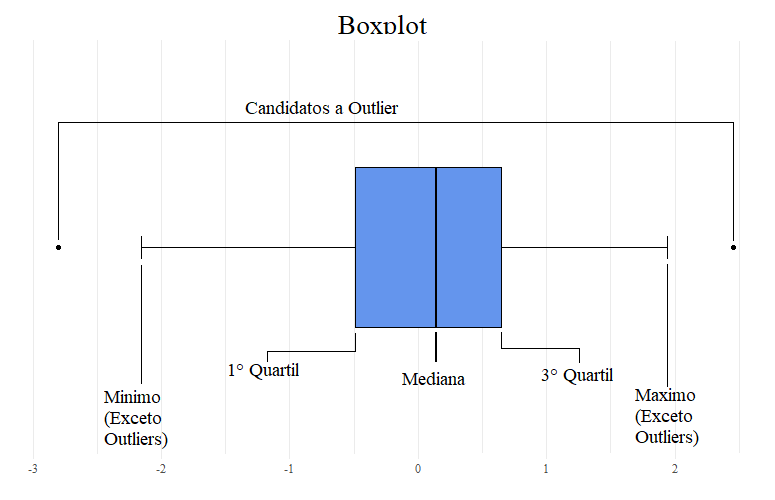

</center>

**1. Distribuição dos Dados:** 

A dispersão dos dados pode ser representada pelo intervalo interquartílico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: Diferença entre o valor máximo e mínimo. Embora a amplitude seja de fácil entendimento, o intervalo interquartílico é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de outliers.

**2. Simetria:** 

Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.

**3. Outliers:** 

Já os outliers indicam possíveis valores discrepantes. No boxplot, as observações são consideradas outliers quando estão abaixo ou acima do limite de detecção de outliers.

Fonte: Relatórios da **ICMC Júnior** (Empresa Júnior em que eu participo).

In [ ]:
clean_df_mean_melted = melt_df(clean_df_mean)
new_order = sorted(clean_df_mean_melted['variable'].unique())

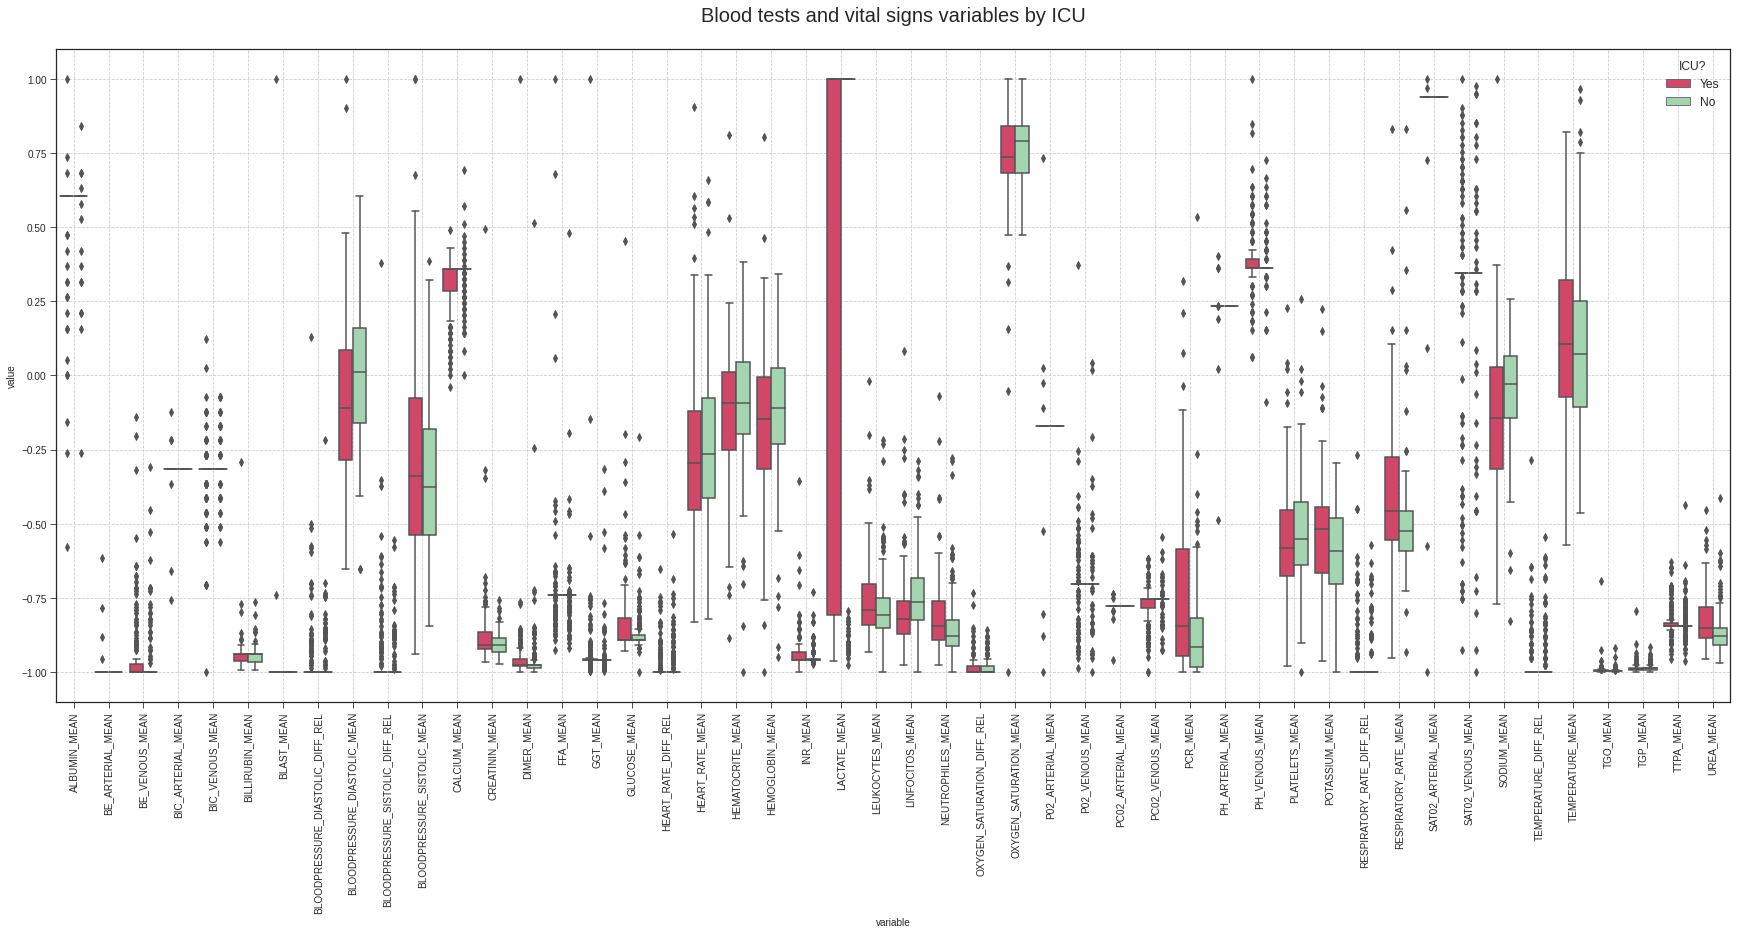

In [ ]:
show_hue_boxplot_in_df_melted(clean_df_mean_melted, figsize=(30, 12), 
                              order=new_order)

- Uma variável que me chamou mais a atenção, é a **`LACTATE_MEAN`**, com uma dispersão extremamente alta dos dados de pacientes que vão para UTI;

- Não irei ficar listando todas as diferenças em cada variável pois são muitas! Vai ficar repetitivo e cansativo... Mas só de ver, dá para se ter uma noção de dispersão e das posições dos quartis, observando assim que **existem diferenças em muitas variáveis**, entre os pacientes que foram para a UTI e os que não foram! Exemplos:

  - `BLOODPRESSURE_SISTOLIC_MEAN`;

  - `HEART_RATE_MEAN`;

  - `PCR_MEAN`;

  - `RESPIRATORY_RATE_MEAN`;
  
  - `TEMPERATURE_MEAN`;

#### **7.4.5. Correlações entre variáveis**

Para finalizar a EDA do meu *DataFrame* principal, vou ver como as variáveis se **correlacionam** entre si, independentemente do `ICU`. Para isso, farei o uso do **mapa de calor das correlações de Pearson**. 

**Observações:** 

1. A correlação de Pearson é um método de análise que permite verificar a existência ou não de uma "certa ligação" entre duas variáveis. Ela é descrita pela seguinte fórmula:

\begin{equation}
\rho = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_xs_y}
\end{equation}

Onde:

- $\bar{x}$ : média da amostra para a variável $x$;

- $s_x$ : desvio padrão para a variável $x$;

- $\bar{y}$ : média da amostra para a variável $y$;

- $s_y$ : desvio padrão para a variável $y$;

- $n$ : número total de amostras coletadas.

Essa medida está definina entre o intervalo [-1,1]:

- Quanto mais próximo de 1, temos uma correlação positiva;

- Quanto mais próximo de -1, temos uma correlação negativa;

-  E quanto mais próximo do zero, mostra que as variáveis não possuem relação entre si. 

O seguinte quadro fornece um guia (em modulo) de como podemos descrever uma correlação em palavras dado o valor numérico. É claro que as interpretações dependem de cada contexto em particular, ou seja, esses intervalos podem mudar como eu quiser (contanto que não sejam muito diferentes da tabela).

<center>

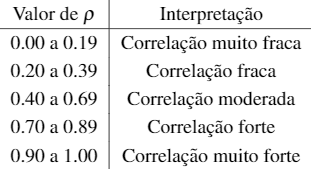

</center>

2. Não utilizarei as correlações mostrando seus valores numéricos, mas de uma forma colorida e mais intuitiva, em um mapa de calor. Estou usando este método pois são muitas variáveis, e vários números dentro de cada quadradinho no gráfico não ficará visualmente bom.

Fonte: algumas definições foram retiradas de relatórios da **ICMC Júnior** (Empresa Júnior em que eu participo).

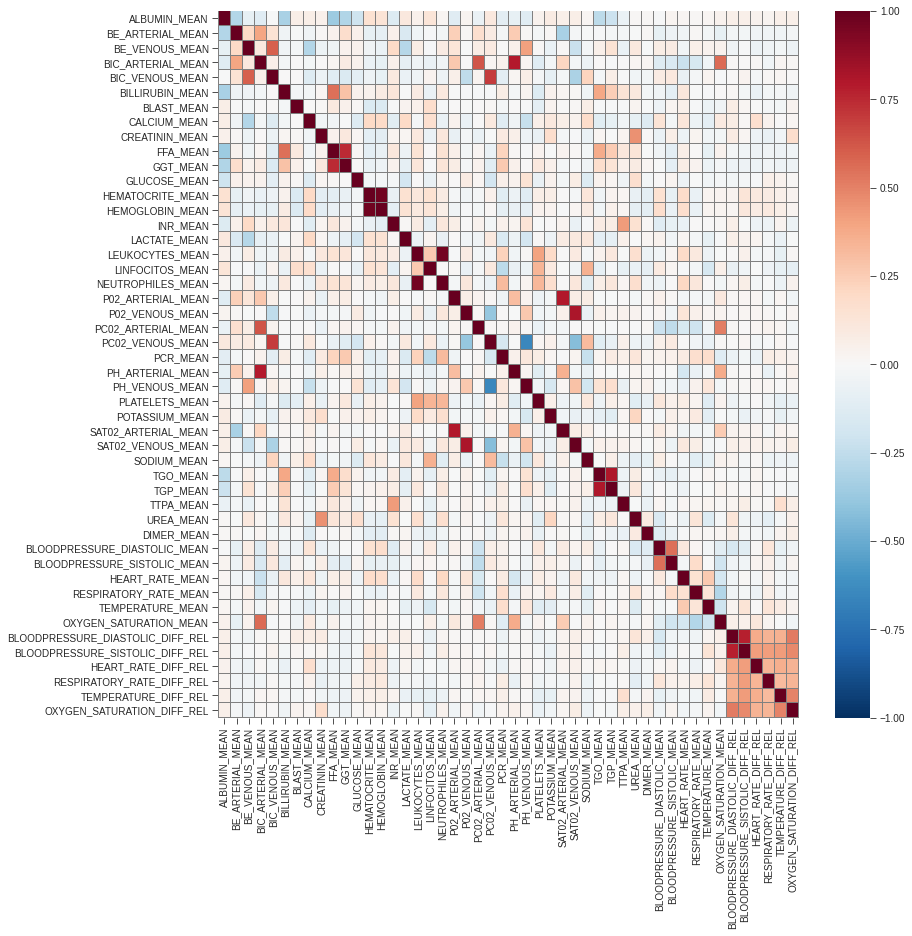

In [ ]:
quantitative_df = quantitative_df_with_icu.iloc[:, :-1]
show_heatmap(quantitative_df)

No mapa acima, **quanto mais forte a coloração, tanto para o vermelho quanto para o azul, mais correlacionado é uma variável com a outra**. Mas como essa coloração é algo bem subjetivo, então vamos tentar achar uma outra forma para saber quais variáveis são altamente correlacionadas.

Um método que eu pensei, é fazer um *DataFrame* e filtrar somente as variáveis que possuem correlação **maior que 0.7** e **menor que -0.7**. Para isso, criei uma função chamada `give_abs_corr_variables_above()`, podendo estabelecer um limiar contínuo absoluto.

**Observação:** Para mais detalhes, visite o código da função `give_abs_corr_variables_above()` na seção 4.3.

In [ ]:
high_corr_variables = give_abs_corr_variables_above(0.7, quantitative_df)
display(high_corr_variables)

{'BIC_ARTERIAL_MEAN': 'PH_ARTERIAL_MEAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL': 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL': 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'FFA_MEAN': 'GGT_MEAN',
 'GGT_MEAN': 'FFA_MEAN',
 'HEMATOCRITE_MEAN': 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MEAN': 'HEMATOCRITE_MEAN',
 'LEUKOCYTES_MEAN': 'NEUTROPHILES_MEAN',
 'NEUTROPHILES_MEAN': 'LEUKOCYTES_MEAN',
 'P02_ARTERIAL_MEAN': 'SAT02_ARTERIAL_MEAN',
 'P02_VENOUS_MEAN': 'SAT02_VENOUS_MEAN',
 'PH_ARTERIAL_MEAN': 'BIC_ARTERIAL_MEAN',
 'SAT02_ARTERIAL_MEAN': 'P02_ARTERIAL_MEAN',
 'SAT02_VENOUS_MEAN': 'P02_VENOUS_MEAN',
 'TGO_MEAN': 'TGP_MEAN',
 'TGP_MEAN': 'TGO_MEAN'}

 Sendo assim, podemos notar correlações fortes ou muito fortes (acima de 0.7 e diferentes de 1) entre:

- `BIC_ARTERIAL_MEAN` e `PH_ARTERIAL_MEAN`;

- `BLOODPRESSURE_SISTOLIC_DIFF_REL` e `BLOODPRESSURE_DIASTOLIC_DIFF_REL`;

- `FFA_MEAN` e `GGT_MEAN`;

- `HEMATOCRITE_MEAN` e `HEMOGLOBIN_MEAN`;

- `LEUKOCYTES_MEAN` e `NEUTROPHILES_MEAN`;

- `P02_ARTERIAL_MEAN` e `SAT02_ARTERIAL_MEAN`;

- `P02_VENOUS_MEAN` e `SAT02_VENOUS_MEAN`;

- `TGO_MEAN` e `TGP_MEAN`.


Aqui vão os gráficos de regressão dessas variáveis.

In [ ]:
dict_vars = {'BIC_ARTERIAL_MEAN' : 'PH_ARTERIAL_MEAN',
             'BLOODPRESSURE_SISTOLIC_DIFF_REL' : 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
             'FFA_MEAN' : 'GGT_MEAN',
             'HEMATOCRITE_MEAN' : 'HEMOGLOBIN_MEAN',
             'LEUKOCYTES_MEAN' : 'NEUTROPHILES_MEAN',
             'P02_ARTERIAL_MEAN' : 'SAT02_ARTERIAL_MEAN',
             'P02_VENOUS_MEAN' : 'SAT02_VENOUS_MEAN',
             'TGO_MEAN' : 'TGP_MEAN'}

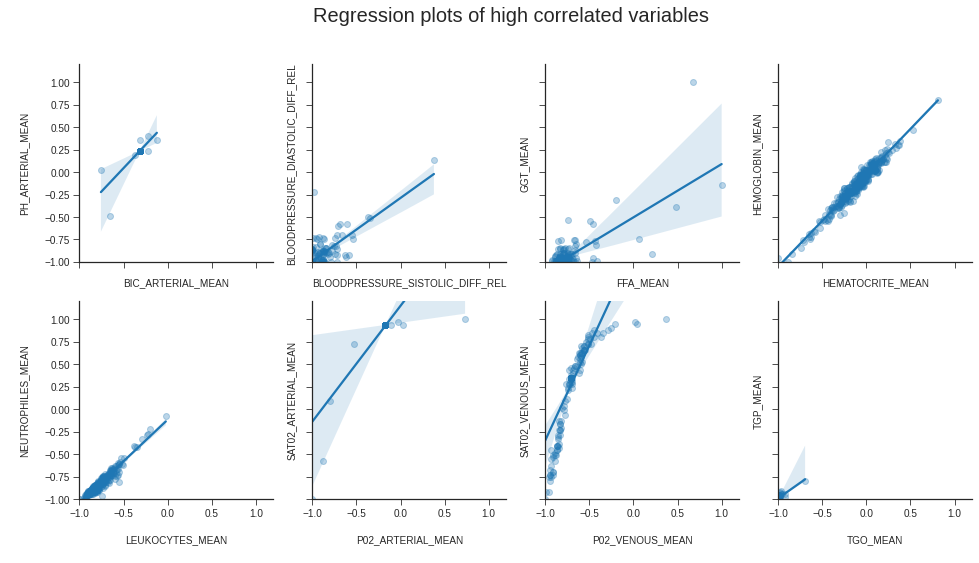

In [ ]:
show_multiple_regplots(dict_vars, (2, 4), quantitative_df,
                       title='Regression plots of high correlated variables')

Com estas visualizações, podemos observar a tendência positiva por meio de uma reta, além de sabermos o intervalo de confiança.

Observemos o seguinte: por mais que a correlação seja alta entre algumas variáveis, a **variabilidade** dos seus pontos **não é muito grande**, como é o caso das relações **`PH_ARTERIAL_MEAN`/`BIC_ARTERIAL_MEAN`** e **`TGP_MEAN`/`TGO_MEAN`**.

Uma explicação para esta última relação, pode estar relacionado com o que [este link](https://medicoresponde.com.br/o-que-e-tgo-e-tgp/) diz:

> TGO (transaminase glutâmico-oxalacética) e TGP (transaminase glutâmico-pirúvica) são enzimas transaminases (ou aminotransferases);

> A TGO está presente no interior de diversas células do corpo (fígado, miocárdio do coração, músculo esquelético, pâncreas, rins, glóbulos vermelhos), enquanto que a TGP é encontrada quase que unicamente nas células do fígado. São responsáveis pela metabolização de algumas proteínas (L-aspartato, alfacetoglutarato, alanina, etc);

> Têm como utilidade o diagnóstico diferencial de doenças do sistema hepatobiliar e do pâncreas (TGO e TGP) ou colaborar com a identificação de infarto de miocárdio e miopatias (TGP). Ou seja, a alto correlação entre essas 2 variáveis é compreensível.

##### **Extra: Todas as correlações**

Caso realmente queira saber todas as correlações entre as variáveis, deixarei a matriz destas abaixo (valores arredondados com 2 casas decimais) - Boa sorte para vê-las! D:

In [ ]:
show_corr_matrix(quantitative_df)

---
## **8. *Machine Learning***

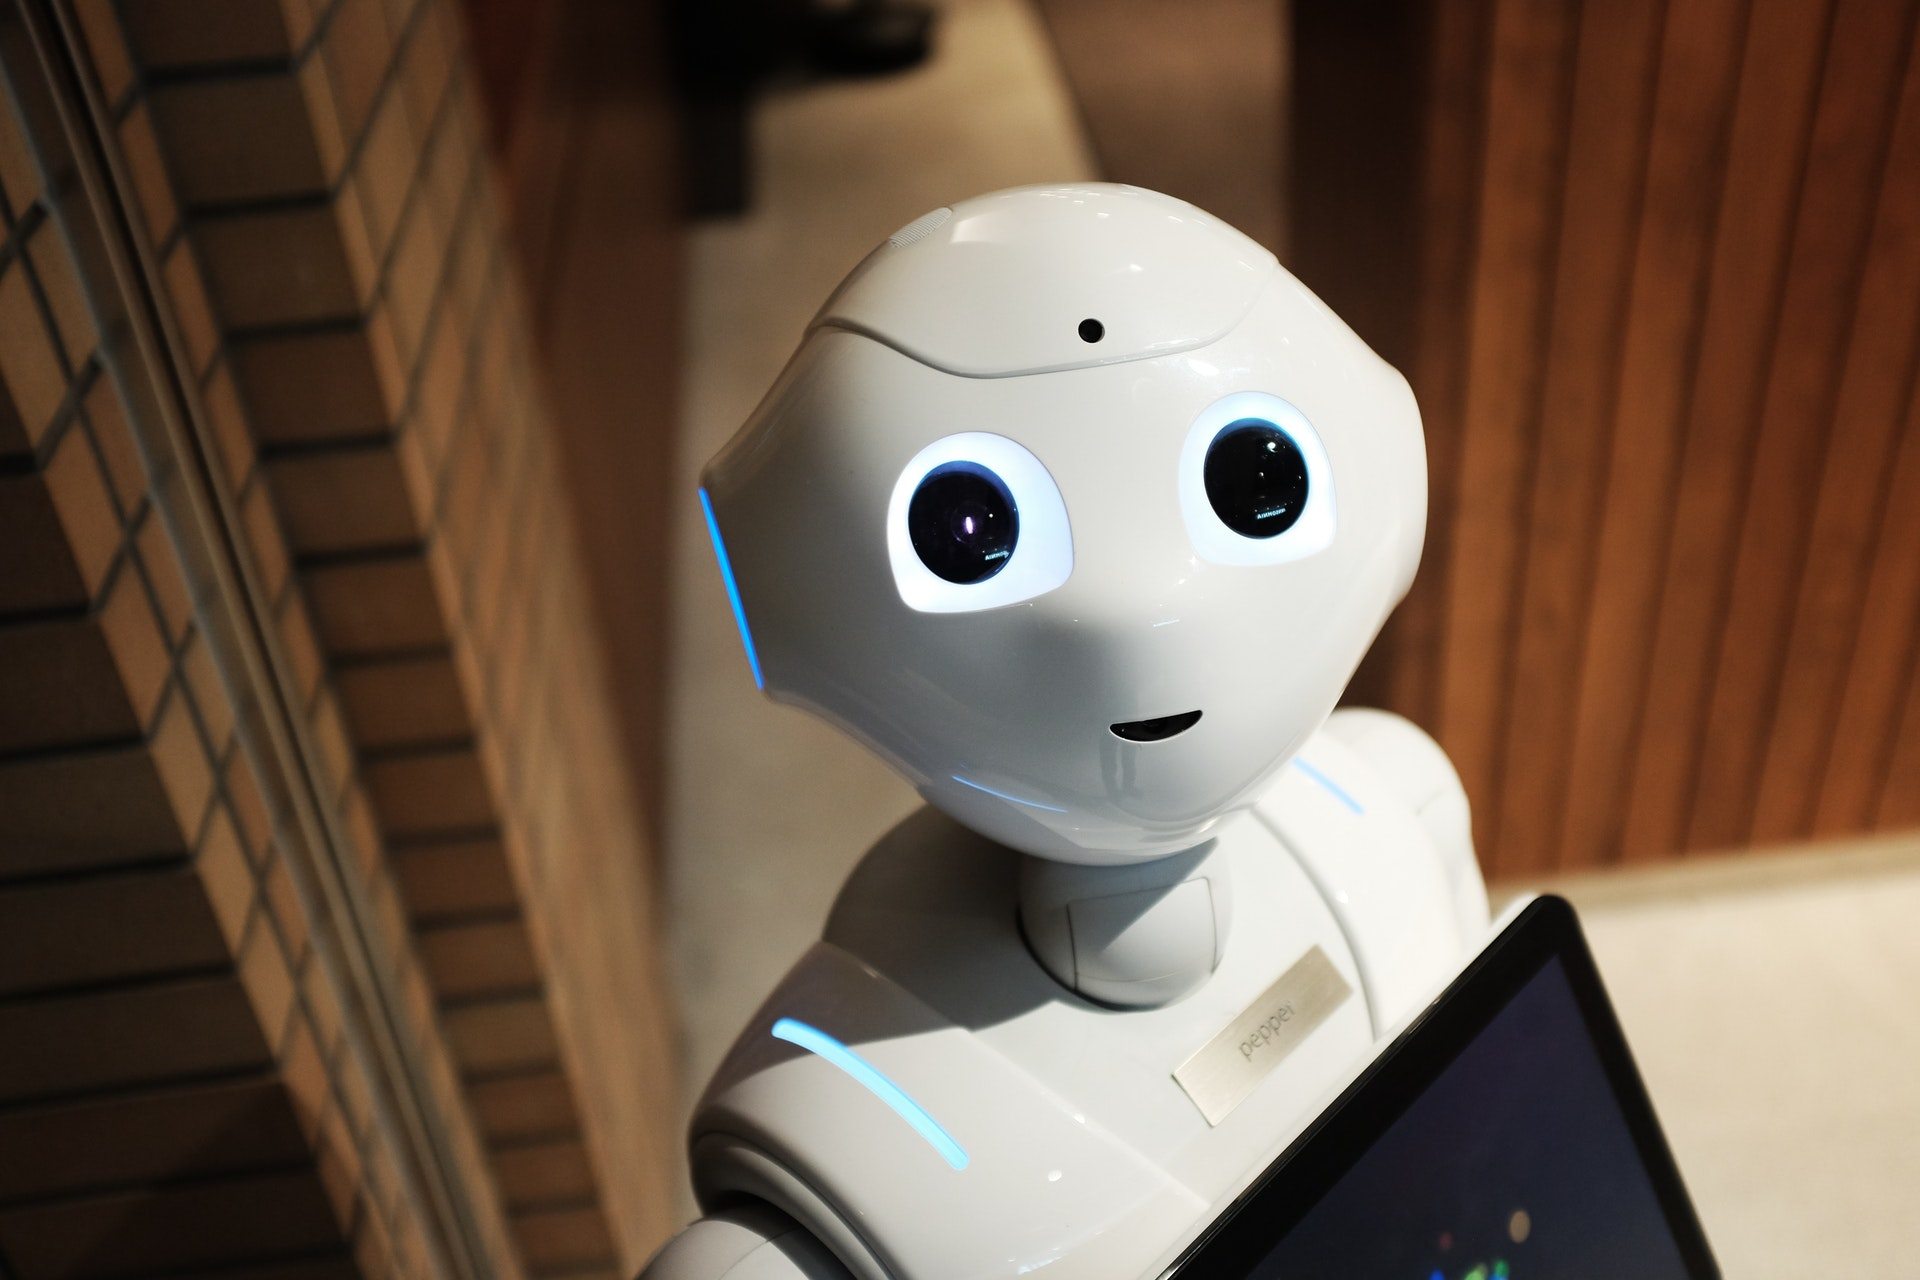

### **8.1. Explicação resumida**

Em resumo, o que acontece é que o computador consegue, a partir de funções matemáticas (algoritmos), encontrar padrões para enfim, prever as futuras entradas. 

Existem dois métodos que são mais utilizados para o aprendizado de máquina, sendo eles o Supervisionado e o Não Supervisionado. A diferença entre estes é que um utiliza uma saída desejada na predição e o outro descobre essa saída por si só, respectivamente. 

Neste *notebook* focarei no **Aprendizado Supervisionado**, já que temos uma variável alvo, aquela que diz se a pessoa vai para a UTI ou não. Aprofundando ainda mais nesse método de aprendizado, temos os modelos de Regressão e de Classificação:

-  Modelos de Regressão: aqui tentamos prever um valor contínuo, como o preço de uma casa por exemplo;

- **Modelos de Classificação**: aqui tentamos prever uma classe, como por exemplo, o nosso próprio problema (admissão de UTI ou não).

Para treinarmos o nosso modelo de *Machine Learning*, precisamos antes seguir um passoa-a-passo, e é isso que será tratado nas próximas seções.

### **8.2. *Feature Selection***

Nesta primeira etapa, selecionamos quais as **variáveis importantes** para os nossos algoritmos futuros. Ela é muito importante pois evita que o aprendizado fique muito "atrelado a certas condições" (***overfitting***), não reconhecendo a previsão certa para as futuras entradas mais abrangentes.

Exemplificando o que é o *overfitting*, seria como um reconhecimento de um cão: saber a característica de que o pelo dele é bem macio pode ser uma restrição somente de uma determinada raça, e caso não tenha essa característica em específico, ou seja, se o algoritmo a levar muito em consideração, ele pode apontar que **não é um cachorro**. O mais ideal é saber **se tem pelos, e não se tem pelos macios**!

E você deve estar se perguntando, "**mas já não fizemos isso?**"

A resposta é sim, fizemos uma **parte dela** na seção 7.4.2, como as *features* que dizem a "mesma coisa" (`MEDIAN`, `MIN` e `MAX`), além de retirar as `DIFF`'s, pois a maioria apresentava valores únicos.

Entretanto, acho que é possível diminuir ainda mais, retirando as que são **altamente correlacionadas**. A idéia intuitiva é que, se uma variável é tão próxima da outra, então elas podem significar a mesma coisa, e isso se torna "redundante" para a máquina, podendo ocasionar até no overfit do modelo!

#### **8.2.1. Meu *DataFrame***

In [ ]:
# Vendo meu DataFrame até agora
clean_df_mean.head()

AGE_ABOVE65  ... ICU
PATIENT_VISIT_IDENTIFIER               ...    
0                                   1  ...   1
2                                   0  ...   1
3                                   0  ...   0
4                                   0  ...   0
5                                   0  ...   0

[5 rows x 61 columns]

Antes de retirar as variáveis quantitativas, observe que a **`AGE_ABOVE65` e `AGE_PERCENTIL` possuem significados bem semelhantes**! A primeira é se a pessoa possui idade acima de 65 anos, e a segunda o percentil de anos dela.

Sendo assim, é melhor escolher apenas uma delas, e **vou selecionar a `AGE_ABOVE65`**. Tudo porque ela é **mais generalista** e, como queremos diminuir o número de colunas, se transformássemos a `AGE_PERCENTIL` em binário (0 ou 1, mais conhecido como **variável *dummy***), terminaríamos com `AGE_PERCENTIL_10th`, `AGE_PERCENTIL_20th`... `AGE_PERCENTIL_90th`, isso equivale a uma **maior quantidade de features**!

In [ ]:
clean_df_mean.drop('AGE_PERCENTIL', axis=1, inplace=True)

In [ ]:
clean_df_mean.head()

AGE_ABOVE65  GENDER  ...  OXYGEN_SATURATION_DIFF_REL  ICU
PATIENT_VISIT_IDENTIFIER                       ...                                 
0                                   1       0  ...                   -1.000000    1
2                                   0       0  ...                   -0.961262    1
3                                   0       1  ...                   -1.000000    0
4                                   0       0  ...                   -0.980333    0
5                                   0       0  ...                   -0.980129    0

[5 rows x 60 columns]

Okay, agora sim vamos retirar as colunas que possuem correlacões fortes. Já que a escolha é arbitrária (relembrando, não saindo muito do padrão), vou escolher um limiar de **0.7** (acima de 0.7 e abaixo de -0.7). 

Isso porque dei uma visão geral nas correlações, além de observar os *boxplots* (**muitos *outliers*** e **baixa dispersão/variablidade dos valores**) e gráficos de regressão (idéia da dispersão ao cruzar as *features*). Acho que este valor de 0.7 pode retirar variáveis que "fazem sentido serem retiradas", pelo menos do ponto de vista estatístico.

Exemplos de correlações altas que entram nas observações acima: 

- `FFA_MEAN` e `GGT_MEAN` (0.74);

- `BLOODPRESSURE_SISTOLIC_DIFF_REL` e `BLOODPRESSURE_DIASTOLIC_DIFF_REL` (0.78);

- `P02_ARTERIAL_MEAN` e `SAT02_ARTERIAL_MEAN` (0.81).

In [ ]:
# Caso queira saber sobre o código da função, acesse a seção 4.3
my_new_df = remove_corr_var(clean_df_mean, 0.7)

Foram removidas as seguintes features:
['GGT_MEAN', 'HEMOGLOBIN_MEAN', 'NEUTROPHILES_MEAN', 'PH_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_VENOUS_MEAN', 'TGP_MEAN', 'BLOODPRESSURE_SISTOLIC_DIFF_REL']


In [ ]:
display(my_new_df)
print(f'Progresso: De 61 variáveis fomos para {my_new_df.shape[1]}!')

AGE_ABOVE65  GENDER  ...  OXYGEN_SATURATION_DIFF_REL  ICU
PATIENT_VISIT_IDENTIFIER                       ...                                 
0                                   1       0  ...                   -1.000000    1
2                                   0       0  ...                   -0.961262    1
3                                   0       1  ...                   -1.000000    0
4                                   0       0  ...                   -0.980333    0
5                                   0       0  ...                   -0.980129    0
...                               ...     ...  ...                         ...  ...
380                                 0       1  ...                   -1.000000    1
381                                 1       0  ...                   -1.000000    0
382                                 0       0  ...                   -1.000000    1
383                                 0       1  ...                   -1.000000    0
384                                 0       1  ...                   -1.000000    0

[352 rows x 52 columns]

Progresso: De 61 variáveis fomos para 52!


#### **8.2.2. Juntando com o *DataFrame* do Sírio**

Lembra daquele *Dataset* criado na seção 6? Então, vamos utilizá-lo agora!

**Observação:** Recapitulando, o objetivo é juntar os dois *DataFrames* criados, o meu e o do Sírio.

In [ ]:
display(sirio_df)

ICU  ...  NEUTROPHILES/LINFOCITOS
PATIENT_VISIT_IDENTIFIER       ...                         
0                           1  ...                 0.949515
2                           1  ...                 0.454450
3                           0  ...                 0.938541
4                           0  ...                 1.267746
5                           0  ...                 2.487410
...                       ...  ...                      ...
380                         1  ...                 0.851571
381                         0  ...                 0.905741
382                         1  ...                 0.894205
383                         0  ...                 1.114293
384                         0  ...                 1.329745

[352 rows x 18 columns]

Bom, vendo bem por cima, parece que a variável `GASO`, **neste conjunto de dados**, não apresenta valores diferentes de 1. **Pode ser que venha a aparecer no futuro**, com *Datasets* atualizados, mas talvez não é o caso agora. Vamos dar uma olhada e confirmar esta hipótese.

In [ ]:
print(sirio_df['GASO'].value_counts())

1    352
Name: GASO, dtype: int64


Pois é, somente existe o valor 1. Logo, não vai ser bom para os algoritmos! Vamos remover a `GASO`.  

In [ ]:
sirio_df.drop('GASO', axis=1, inplace=True)

In [ ]:
sirio_df.head()

ICU  ...  NEUTROPHILES/LINFOCITOS
PATIENT_VISIT_IDENTIFIER       ...                         
0                           1  ...                 0.949515
2                           1  ...                 0.454450
3                           0  ...                 0.938541
4                           0  ...                 1.267746
5                           0  ...                 2.487410

[5 rows x 17 columns]

Beleza! Antes de juntar os dois conjuntos de dados, vamos rever como foram criadas algumas variáveis do `sirio_df` (mais informações na função `makebio_df()` - seção 4.3):

- `BLOODPRESSURE_ARTERIAL_MEAN` = (`BLOODPRESSURE_SISTOLIC_MEAN` + 2 * `BLOODPRESSURE_DIASTOLIC_MEAN`) / 3;
- `NEUTROPHILES/LINFOCITOS` = `NEUTROPHILES_MEAN` / `LINFOCITOS_MEAN`.

Então basicamente, a `BLOODPRESSURE_ARTERIAL_MEAN` e a `NEUTROPHILES/LINFOCITOS` estão **transformando duas variáveis em uma**, ou seja, **resumindo melhor o *Dataset***.

Como o hospital sabe o que está fazendo, no quesito de **"selecionar as melhores variáveis no contexto da saúde"**, vou optar por excluir as seguintes *features* do meu *DataFrame*, dado que depois vamos juntar os dois conjuntos de dados:



- `BLOODPRESSURE_SISTOLIC_MEAN`;

- `BLOODPRESSURE_DIASTOLIC_MEAN`;

- `NEUTROPHILES_MEAN`;

- `LINFOCITOS_MEAN`.

In [ ]:
columns_to_verify_1 = ['BLOODPRESSURE_SISTOLIC_MEAN',
                       'BLOODPRESSURE_DIASTOLIC_MEAN',
                       'NEUTROPHILES_MEAN',
                       'LINFOCITOS_MEAN']

my_new_df = transform_df_removing(columns_to_verify_1, my_new_df)

BLOODPRESSURE_SISTOLIC_MEAN : Presente no df.
BLOODPRESSURE_DIASTOLIC_MEAN : Presente no df.
NEUTROPHILES_MEAN : Não presente no df.
LINFOCITOS_MEAN : Presente no df.

Colunas acima já removidas do DataFrame.


Legal! Estamos quase terminando esse processo e finalmente poderemos juntar tudo!

Uma coisa que eu notei, é que o Sírio não utilizou a média (`MEAN`) de algumas variáveis, como é o caso da `HEART_RATE_MAX`, `OXYGEN_SATURATION_MIN` e `RESPIRATORY_RATE_MAX`. Será que existe alguma razão para isso?

Provavelmente sim, e como não sei nada de medicina, vou deletar as mesmas variáveis que tenho no meu *DataFrame* (médias - `MEAN`).

In [ ]:
columns_to_verify_2 = ['HEART_RATE_MEAN', 
                       'OXYGEN_SATURATION_MEAN',
                       'RESPIRATORY_RATE_MEAN']

my_new_df = transform_df_removing(columns_to_verify_2, my_new_df)

HEART_RATE_MEAN : Presente no df.
OXYGEN_SATURATION_MEAN : Presente no df.
RESPIRATORY_RATE_MEAN : Presente no df.

Colunas acima já removidas do DataFrame.


In [ ]:
display(my_new_df)
print(f'Progresso: De 52 variáveis fomos para {my_new_df.shape[1]}!')

AGE_ABOVE65  GENDER  ...  OXYGEN_SATURATION_DIFF_REL  ICU
PATIENT_VISIT_IDENTIFIER                       ...                                 
0                                   1       0  ...                   -1.000000    1
2                                   0       0  ...                   -0.961262    1
3                                   0       1  ...                   -1.000000    0
4                                   0       0  ...                   -0.980333    0
5                                   0       0  ...                   -0.980129    0
...                               ...     ...  ...                         ...  ...
380                                 0       1  ...                   -1.000000    1
381                                 1       0  ...                   -1.000000    0
382                                 0       0  ...                   -1.000000    1
383                                 0       1  ...                   -1.000000    0
384                                 0       1  ...                   -1.000000    0

[352 rows x 46 columns]

Progresso: De 52 variáveis fomos para 46!


Repare que existem colunas iguais entre os dois conjuntos. O ideal é deixá-las em comum para juntar tudo.

In [ ]:
# Dropando as colunas em comum entre os dois DataFrames,
# no conjunto do Sírio
columns_in_common = []
my_new_df_cols = my_new_df.columns
sirio_df_cols = sirio_df.columns

for col in my_new_df_cols:
  if col in sirio_df_cols:
    columns_in_common.append(col)

sirio_df.drop(columns_in_common, axis=1, inplace=True)

In [ ]:
# Dropando a coluna "ICU" para colocá-la no final do DataFrame
# que irá ser criado ("final_df")
icu = my_new_df['ICU']
my_new_df.drop('ICU', axis=1, inplace=True)

# Hora da FUSÃO!
final_df = my_new_df.copy().join(sirio_df)

# Juntando o "ICU" novamente
final_df['ICU'] = icu

In [ ]:
display(final_df)
print(f'Progresso: De 46 variáveis fomos para {final_df.shape[1]}!')

AGE_ABOVE65  GENDER  ...  NEUTROPHILES/LINFOCITOS  ICU
PATIENT_VISIT_IDENTIFIER                       ...                              
0                                   1       0  ...                 0.949515    1
2                                   0       0  ...                 0.454450    1
3                                   0       1  ...                 0.938541    0
4                                   0       0  ...                 1.267746    0
5                                   0       0  ...                 2.487410    0
...                               ...     ...  ...                      ...  ...
380                                 0       1  ...                 0.851571    1
381                                 1       0  ...                 0.905741    0
382                                 0       0  ...                 0.894205    1
383                                 0       1  ...                 1.114293    0
384                                 0       1  ...                 1.329745    0

[352 rows x 51 columns]

Progresso: De 46 variáveis fomos para 51!


#### **8.2.3. *DataFrame* final**

Ufa, estamos indo bem com o processamento das variáveis! No começo, haviam 229 colunas e agora, estamos com 51! É muito importante conseguirmos diminuir a dimensão de nosso *DataFrame* final, principalmente se estiver com várias colunas, pois como já dito, isso evita o *overfitting*!

Mas será que ainda conseguimos melhorar mais? Fiquei pensando a respeito, e sim, podemos ver, novamente, se existem variáveis que são altamente correlacionadas! Estamos realizando este processo de novo pois entraram algumas variáveis novas (do Sírio).

In [ ]:
final_df = remove_corr_var(final_df, 0.7)

Foram removidas as seguintes features:
[]


Uhuu! Não existem mais *features* que são altamente correlacionadas. Acho que o processo de *feature selection* foi muito bem feito até agora!

### **8.3. Dividindo nas variáveis independentes e dependente**

Vamos separar, nesta seção, as *features* de X (variáveis independentes) e a nossa variável *target* (y).

In [ ]:
# Dividindo o nosso DataFrame em X e y
X = final_df.drop('ICU', axis=1).values
                 
y = final_df['ICU'].values

Beleza, antes de irmos para a parte de treino e teste dos modelos, acho que o ideal é dar uma **explicada breve** em alguns conceitos como:

- **Modelos de *Machine Learning* que irei utilizar**;

- **Métricas para avaliação**;

- ***Cross-Validation***;

- **Intervalo de Confiança**.

### **8.4. Explicação dos modelos**

**Observação:** Os algoritmos foram escolhidos de acordo com o meu conhecimento atual (**03/2021**). É claro que poderíamos envolver outros modelos, mas preferi optar pelos que eu mais conheço.

#### **8.4.1. *Naive-Bayes***

O funcionamento deste algoritmo se dá pelo uso do **Teorema de Bayes**:

\begin{eqnarray}\\
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
\end{eqnarray}

Basicamente, o **A** seria a nossa variável *target* (y) quando ela é igual a uma determinada label, e o **B** todas as variáveis independentes (X) de cada linha (amostra).

O Naive-Bayes funciona na base da comparação, então é comparado a probabilidade de A = "classe m" dado que B acontece, com m variando entre todas as *labels* de A, no nosso caso, seriam 0 e 1.

No final, a maior probabilidade de A equivalente a uma determinada *label* (**n**) dado B, irá ser a nossa predição final, ou seja, **y predito = n**.

Para mais informações, acesse [esse vídeo](https://www.youtube.com/watch?v=Bk2mSIMw_XE).

#### **8.4.2. *Logistic Regression***

O modelo de Regressão Logística é utilizado para descrever uma variável quantitativa como algo classificatório (binário). O método utiliza a probabililidade de ocorrer tal valor (quantitativo), sendo assim, se for uma probabilidade menor que 50% (conseguimos mudar esse parâmetro), então ele classifica como "não possível" (0), já se for acima, como "possível" (1).



A função que ela utiliza é a **sigmoid**, com a fórmula abaixo:

\begin{eqnarray}
\sigma(t) = \frac{e^t}{e^t + 1} = \frac{1}{1 + e^{-t}}
\end{eqnarray}

Dado uma função linear *t*, temos: 

\begin{eqnarray}
t = \beta_0 + \beta_1x
\end{eqnarray}

Então:

\begin{eqnarray}
p(x) = \sigma(t) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
\end{eqnarray}

Vai um exemplo abaixo:

<center>

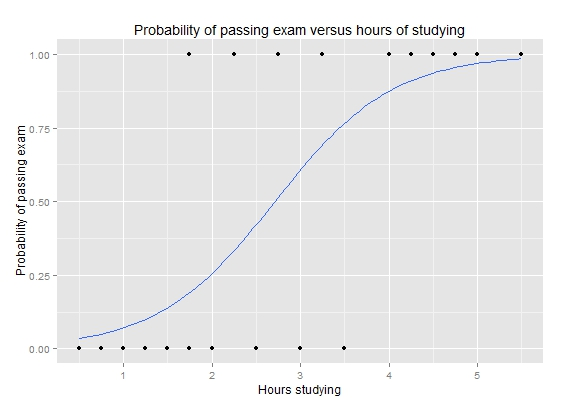

</center>

Fonte da imagem acima: [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

A função t pode ter várias variáveis independentes, com seus determinados pesos. Ela é facilmente descoberta com algoritmos no python (`sklearn`), então não precisamos nos atentar com as exigências matemáticas.

#### **8.4.3. *Decision Tree Classifier***

Esse algoritmo tenta dividir o nosso treinamento a partir de determinadas condições (*labels* das variáveis independentes), então é como se fosse uma "árvore" se dividindo em várias possibilidades (eventos aleatórios).

<center>

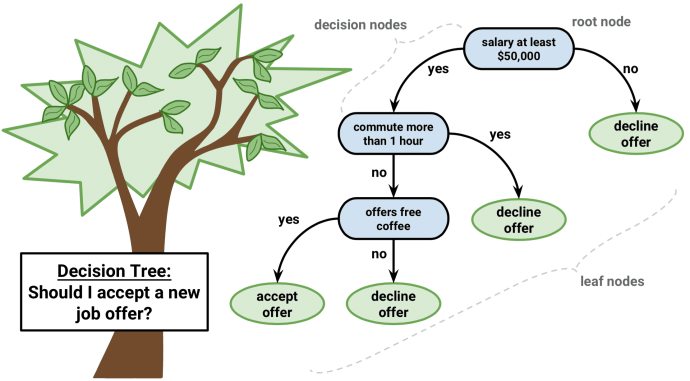

</center>

Fonte da imagem acima: [Este link](https://medium.datadriveninvestor.com/decision-trees-lesson-101-f00dad6cba21?gi=b3431d9a04b5).

Para saber como essa Árvore é montada, existe um critério de impureza (divisão) dos ramos chamado de "**Gini**". Este índice mede o grau ou a **probabilidade de uma determinada variável ser classificada erroneamente quando escolhida aleatoriamente**.

Mas o que realmente significa "impureza"? Se todos os elementos pertencerem a uma única classe, ela pode ser chamada de pura. O grau do índice de Gini varia entre 0 e 1, onde 0 denota que todos os elementos pertencem a uma determinada classe ou se existe apenas uma classe, e 1 denota que os elementos estão distribuídos aleatoriamente em várias classes. Um índice de Gini de 0,5 denota elementos igualmente distribuídos em algumas classes.

\begin{eqnarray}
Gini = 1 - \sum_{i=1}^{n}(p_i)^2
\end{eqnarray}

Onde $p_i$ é a probabilidade de um objeto ser classificado em uma determinada classe.

**Quanto maior for o índice de Gini, mais as variáveis vão ficando significativas e portanto, vão se estabelecendo nos nós mais relevantes de nossa Árvore (primordiais)**. O inverso acontece para os índices menores.

#### **8.4.4. *Random Forest Classifier***

Esse algoritmo utiliza Árvores de Decisão por baixo dos panos. Na verdade, ela usa uma técnica chamada ***Ensemble Learning***, o qual testa vários algoritmos (iguais ou diferentes, no nosso caso são várias árvores diferenciadas entre si) com amostras e colunas distintas (randomizadas).

<center>

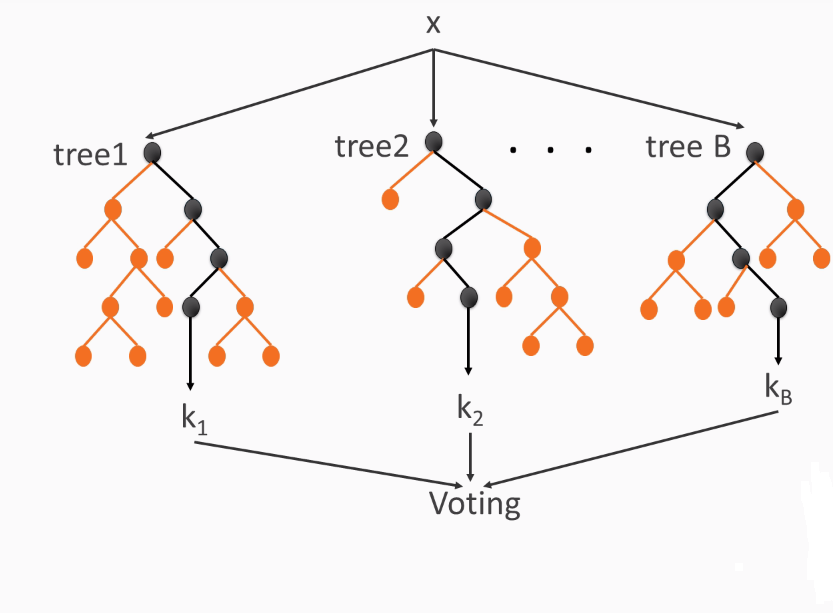

</center>

Fonte da imagem acima: [Este link](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789539462/2/ch02lvl1sec14/random-forests).

No final, se a **maioria** das árvores apresentar resultados nas predições iguais a 1, por exemplo, então a **predição final** vai ser igual a 1. É esse o funcionamento por trás da *random forest*, de forma intuitiva.

### **8.5. Como avaliar os modelos**

Bom, dada a seleção de alguns algoritmos, o ideal é compará-los através de algumas medidas. Vou listar a explicação delas aqui em baixo.

#### **8.5.1. *Confusion Matrix***

É a tabela em que separamos os valores que são preditos (colunas), de acordo com os dados de teste reais (linhas), vai uma figura explicativa:

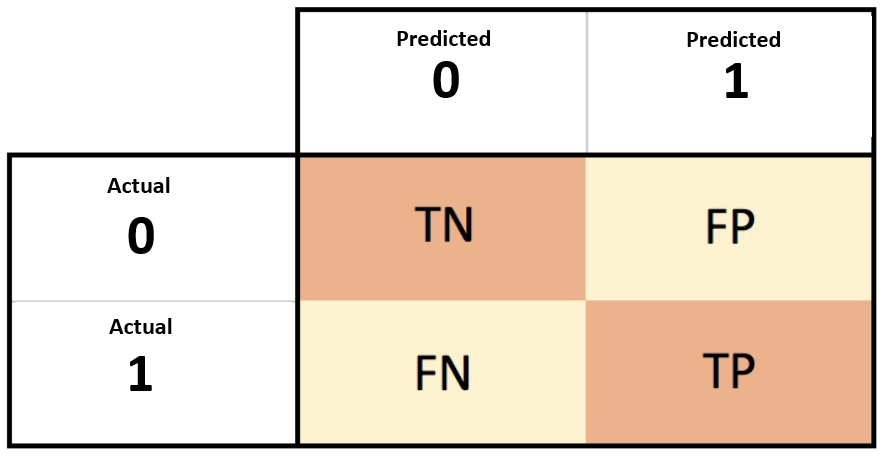

Fonte da imagem acima: [Este link](https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa).

  - ***True Negative (TN)* ou Verdadeiros Negativos (VN)**: valores reais iguais a **0** e que **foram** preditas corretamente;

  - ***False Positive (FP)* ou Falsos Positivos (FP)**: valores reais iguais a **0** e que **não foram** preditas corretamente;

  - ***False Negative (FN)* ou Falsos Negativos (FN)**: valores reais iguais a **1** e que **não foram** preditas corretamente;

  - ***True Positive (TP)* ou Verdadeiros Positivos (VP)**: valores reais iguais a **1** e que **foram** preditas corretamente;

Todas as métricas da próxima seção são baseadas nesta matriz de confusão!

#### **8.5.2. Métricas comparativas**

- ***Accuracy***: dentre todas as classificações, quantas o modelo classificou corretamente. É utilizado mais para ter uma performance geral:

\begin{eqnarray}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{eqnarray}

- ***Precision***: dentre todas as **classificações que o modelo fez**, quantas de **classe 1** estão corretas. É usado em situações em que o **FP é mais prejudicial que FN**:

\begin{eqnarray}
Precision = \frac{TP}{TP + FP}
\end{eqnarray}

- ***Recall* ou *Sensitivity***: dentre todas as **situações reais**, quantas de **classe 1** o modelo acertou. É usado em situações em que o **FN é mais prejudicial que FP**:

\begin{eqnarray}
Recall = \frac{TP}{TP + FN}
\end{eqnarray}

- ***F1-Score***: é a média harmônica entre *precision* e *recall*. Mas basicamente, ela é **sensível a valores muito pequenos**, tanto da primeira medida quanto da segunda:

\begin{eqnarray}
F1 Score = 2 * \frac{Precision * Recall}{Precision + Recall}
\end{eqnarray}

- ***AUC***: é a probabilidade de que um exemplo positivo aleatório seja pontuado acima de um exemplo negativo aleatório. Então **quanto maior a taxa de TP (taxa de TP comparado com os valores reais) em relação a taxa de FP (taxa de FP comparado com os valores reais), maior tende a ser o AUC**. Também existe a **curva ROC**, que explica melhor essa situação, e a AUC é a área abaixo desta curva:

<center>

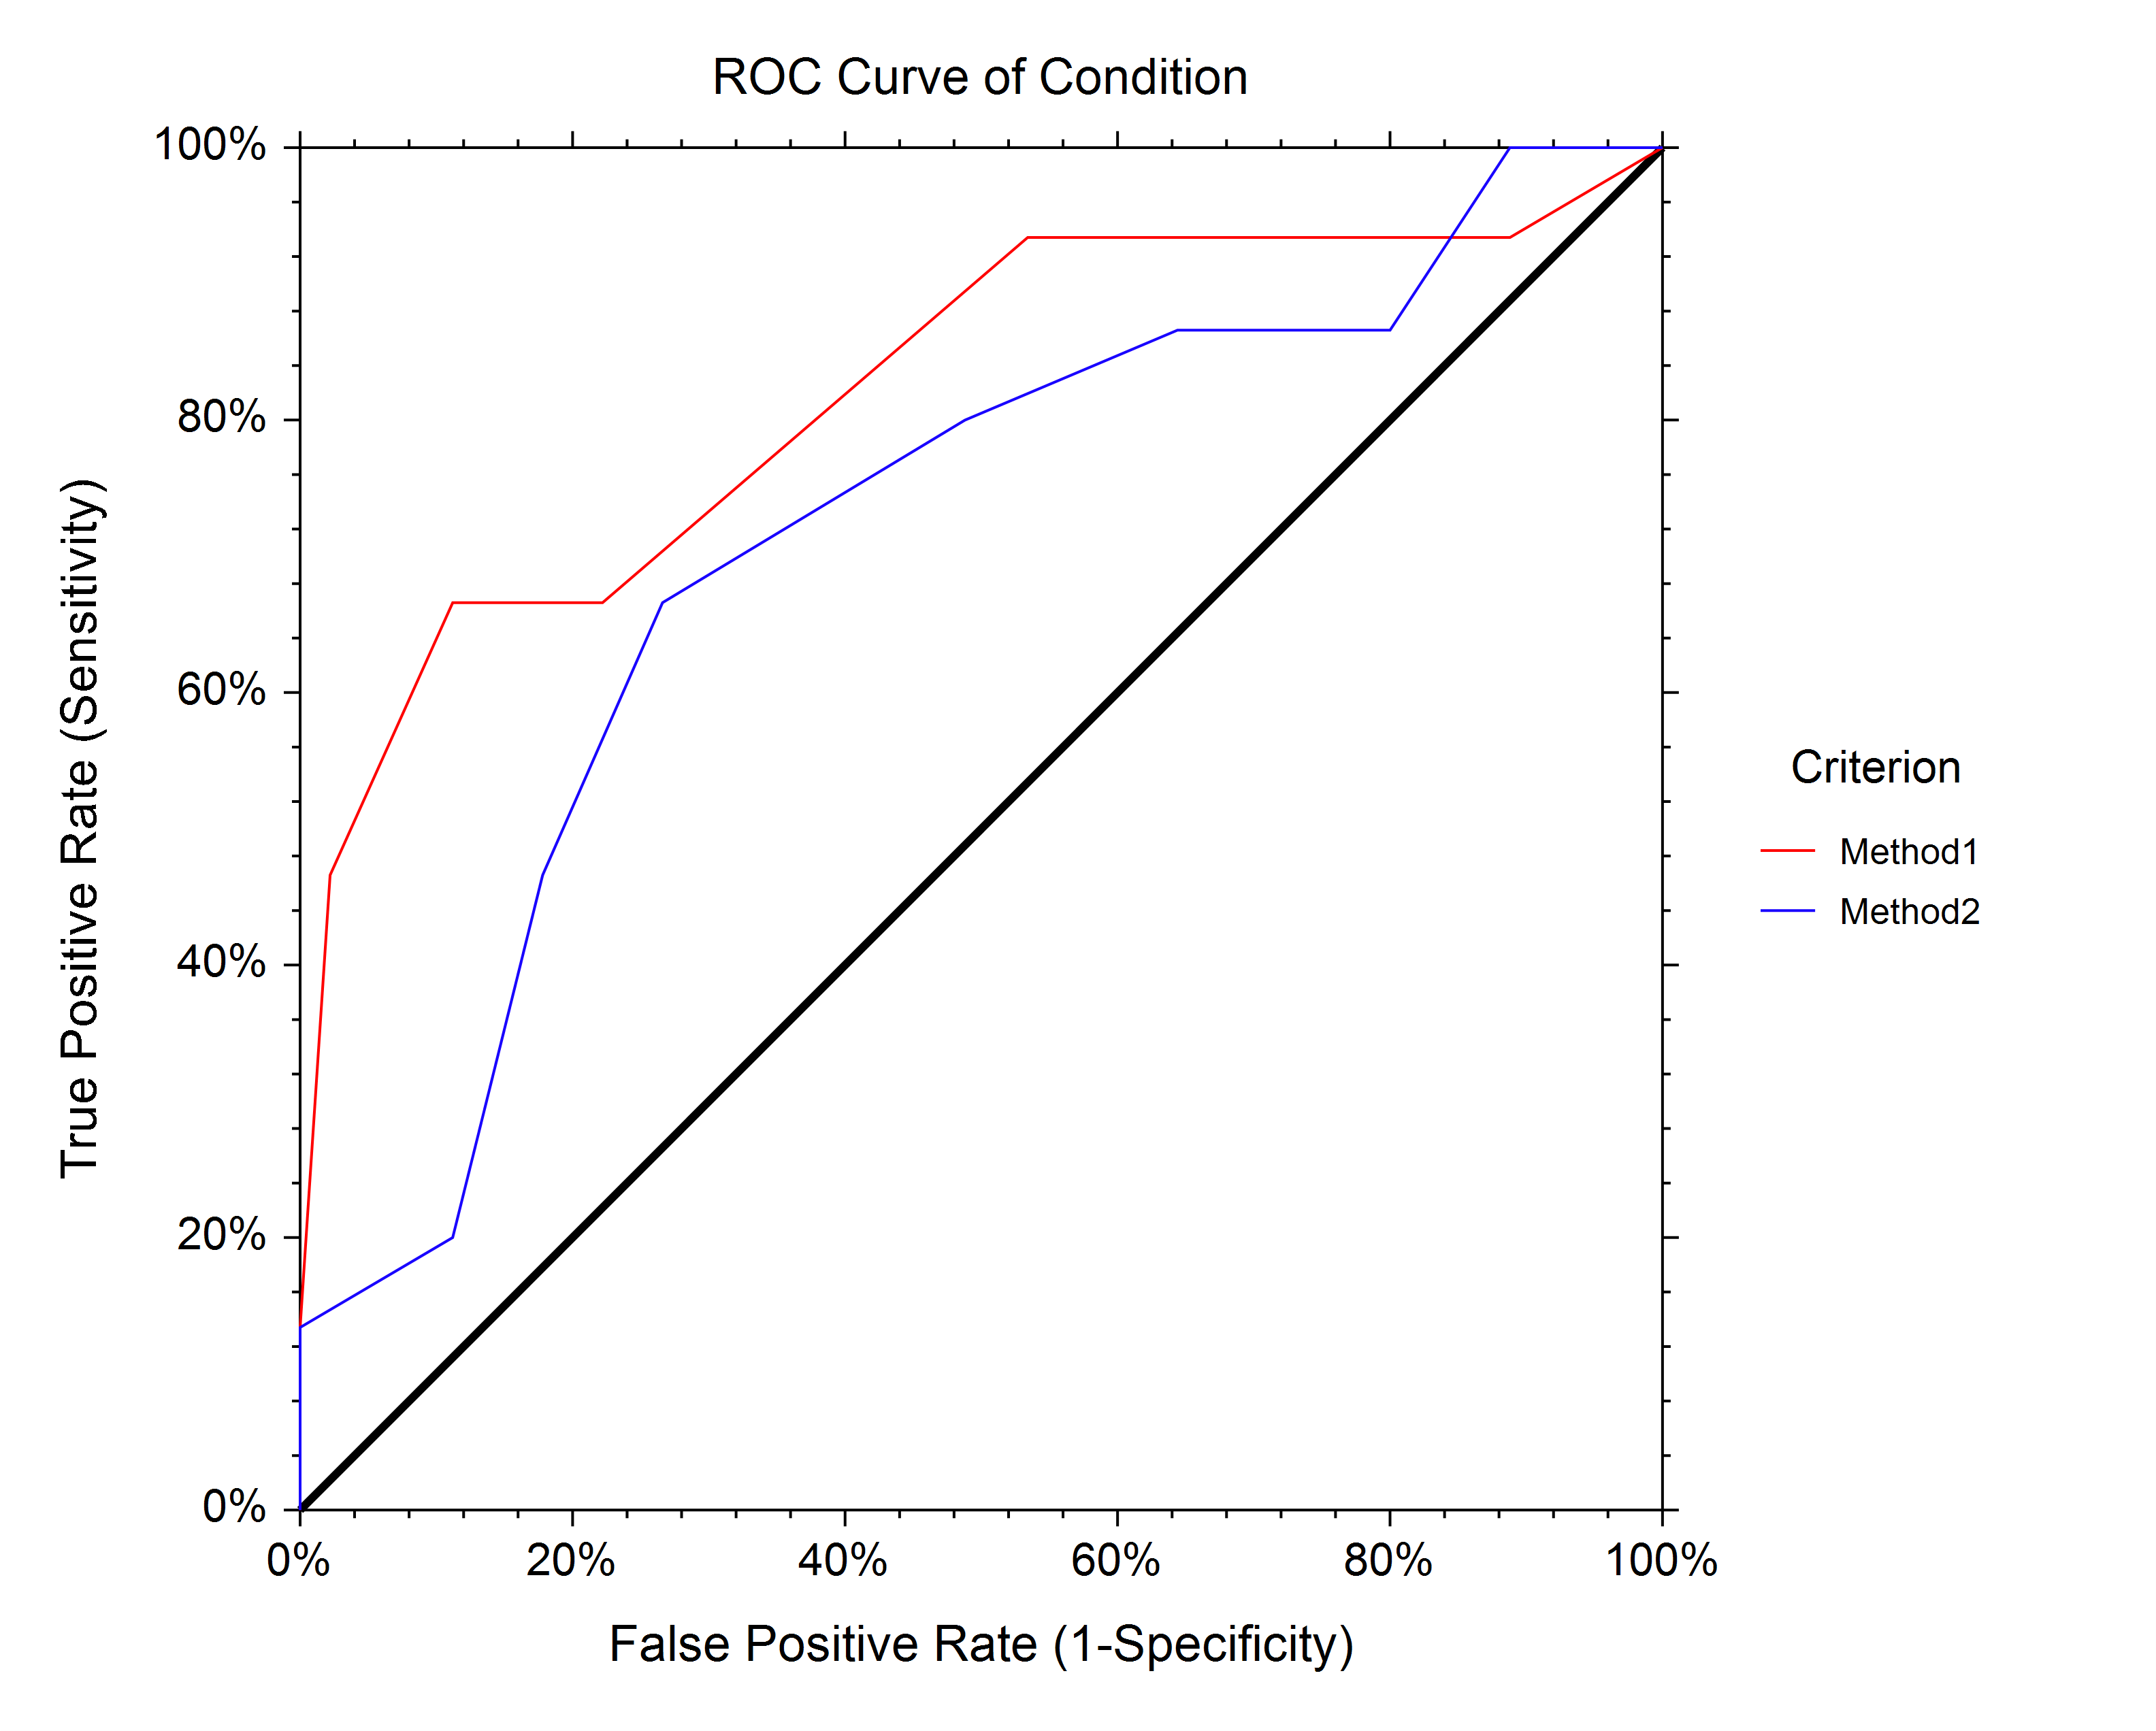

</center>

Fonte da imagem acima: [Este link](https://www.ncss.com/software/ncss/nonparametric-analysis-in-ncss/).

No gráfico, pode-se concluir que o "Method1" possui um melhor aprendizado.

**Observação:** *Specificity* tem como significado: "**quanto dos casos reais iguais a 0 foram acertados pelo modelo?**" Vai a fórmula abaixo, para calculá-lo.

\begin{eqnarray}
Specificity = \frac{TN}{TN + FP}
\end{eqnarray}

### **8.6. O que é *Cross-Validation*?**

O *Cross-Validation* **diminui o fator da aleatoriedade** nos modelos, ao selecionar partes para treino e teste. O que eu quero dizer com isso?

A idéia é simples. Se estamos dividindo o nosso conjunto de dados em 80% para treino e 20% para teste, por exemplo, quais partes estamos pegando para fazer essa repartição? Se pegarmos o começo do nosso *DataFrame* para teste, o resultado seria o mesmo se pegássemos o final? É disso que se trata a aleatoriedade.

Os *scores* provavelmente não seriam os mesmos, mas tenderiam a valores próximos! Neste caso, o ideal é pegarmos um valor que tende para o centro, ou seja, a média ou mediana de todos os *scores*. Sendo assim, o procedimento, de forma mais detalhada, seria o seguinte:

1. De acordo com o estimador (existem vários), será feito uma divisão do *DataFrame* em k blocos (*folds*);

2. Treinamento com os k-1 blocos e teste com apenas 1 deles;

3. Iteração deste, variando entre os k blocos. Em cada rodada, será coletada uma métrica para comparar todas as iterações;

4. No final, tiramos a média destas métricas, resultando em um valor mais representativo.


Aqui vai uma imagem ilustrativa dos processos de 1 a 3:

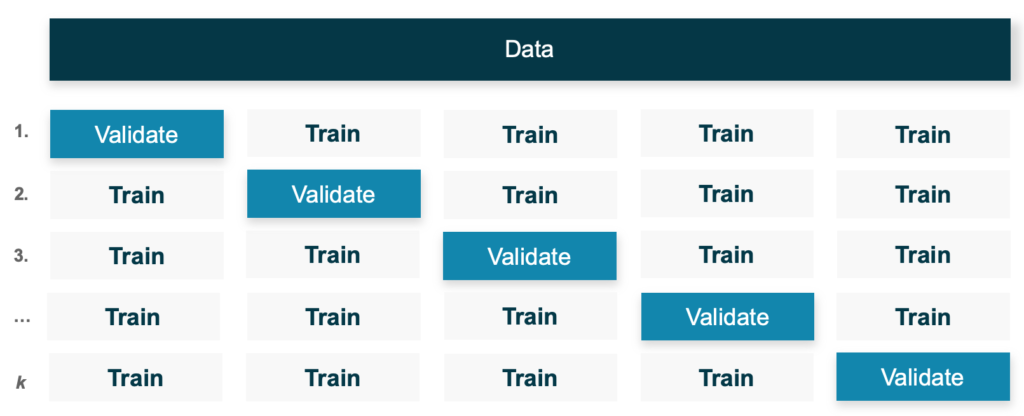

Fonte da imagem acima: [Este link](https://www.statworx.com/de/blog/evaluating-model-performance-by-building-cross-validation-from-scratch/).

**Observação:** o estimador que irá ser utilizado se chama **`RepeatedStratifiedKFold()`**. Nele diminuímos ainda mais o fator aleatório, pois ele segue as seguintes etapas:

1. Validação cruzada padrão, de início, porém com os dados estratificados, ou seja, os dados de treino e teste são divididos na mesma porcentagem de *target* (y);

2. Após o término da primeira validação, é embaralhado o *DataFrame*, e repetido o mesmo processo n vezes (quantidade definida pelo usuário do código).

Quanto mais diminuirmos o fator aleatório, ainda mais neste *Dataset* do Sírio, em que possui **poucas linhas**, é de extrema importância!

### **8.7. Intervalo de Confiança**

Assumindo que os nossos dados sigam uma **distribuição normal**, temos então que, dada uma média de um conjunto de dados, conseguimos inferir um certo **intervalo de confiança** com o própio **desvios padrão**. 

Em outras palavaras, os valores contínuos de uma determinada variável podem cair dentro deste intervalo, com um **nível de confiabilidade estatístico**. Veja a figura abaixo para entender melhor.

**Observação:** Interpretando melhor esta confiabilidade, é como se a cada 100 amostras aleatórias desta variável, 95 caem dentro deste intervalo, as outras 5 não.

<center>

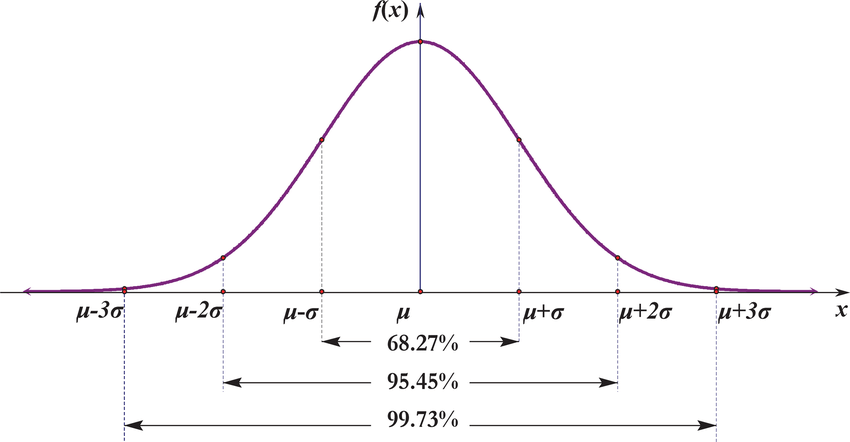

</center>

Fonte da imagem acima: [Este link](https://www.researchgate.net/figure/The-confidence-intervals-correspond-to-3-sigma-rule-of-the-normal-distribution_fig3_273955667).

A fórmula para se calcular o intervalo de confiança, em uma distribuição normal, é dada por:

\begin{eqnarray}
CI = \mu \pm n \times \sigma
\end{eqnarray}

Em que:

- $CI$:  "*confidence interval*", ou intervalo de confiança;
- $\mu$: média da amostra;
- $n$: quantidade de desvios padrões;
- $\sigma$: desvio padrão. 

**Observações:** 

- Normalmente, a probabilidade utilizada nos intervalos de confiança de uma distribuição normal é de **95%**, ou seja, um $n$ igual a **2**;

- Em nosso caso, estou calculando o intervalo de confiança porque existem poucas amostras (linhas), dando a possibilidade do nosso algoritmo estar enviesado pela aleatoriedade!

### **8.8. Qual o meu objetivo com todos esses conceitos?**

Você deve estar se perguntando, depois de tantas definições, **como essas coisas serão usadas?** Então deixarei abaixo uma descrição da minha metodologia para se descobrir qual o melhor modelo de *Machine Learning* (dentre os citados):

1. **Criação dos modelos** com os parâmetros padrões da biblioteca `sklearn`;

2. ***Cross-validation* com o `RepeatedStratifiedKFold()` (5 *folds*, ou blocos, e 10 embaralhamentos do *DataFrame*) em todos os algoritmos**, para inferir a **média** e os **intervalos de confiança (confiabilidade de 95%)** da/o:

  - ***Accuracy***;
  
  - ***Precision***;

  - ***Recall***;

  - ***AUC***;

  - ***F1-Score***.

3. Descobrir o melhor modelo avaliando essas métricas. Caso os resultados fiquem extremamente próximos entre determinados modelos, o desempate será feito no ***tuning* de hiperparâmetros** (explicado nas próximas seções deste *notebook*).

### **8.9. Vamos colocar tudo em prática**

#### **8.9.1. Definindo os modelos**

In [ ]:
# Naive-Bayes
nb = GaussianNB()

# Logistic Regression
lr = LogisticRegression()

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Random Forest Classifier
rf = RandomForestClassifier()

#### **8.9.2. Avaliando as métricas**

In [ ]:
models = [nb, lr, dt, rf]
metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

display(Javascript('''google.colab.output.setIframeHeight(0, true, 
                                                          {maxHeight: 5000})'''))
for metric in metrics:
  show_ml_metrics_results(models, X, y, 5, 10, metric)
  print('\n')

<IPython.core.display.Javascript object>

Score selected: accuracy




Score selected: precision




Score selected: recall




Score selected: roc_auc




Score selected: f1


O melhor modelo sem dúvidas é o ***Random Forest Classifier***! Isto porque, no nosso caso, queremos saber mais sobre as 3 últimas medidas:

- ***Recall*** é muito importante ser maior, pois os FN pesam muito mais que os FP, ou seja, as **pessoas que não são preditas como UTI = Sim e na verdade deveriam ser, podem literalmente estar morrendo por conta do nosso algoritmo!** É uma medida que precisamos tomar muito cuidado! Nesse quesito, o IC e a média desta medida foram **maiores no *Random Forest***!;

- ***AUC*** é importante porque conseguimos saber a performance dos modelos, e nisso a ***Random Forest*** também se saiu na frente nas 3 colunas;

- ***F1-Score*** é legal ser alto, pois isso indica que a ***precision* e a *recall* não estão variando muito entre si**. A ***Random Forest*** ganha também aqui.

**Observação:** No nosso caso em específico, ***precision* alta quer dizer que estaríamos necessitando de mais UTI, e entretanto, na realidade, isso não é uma urgência**. Sendo assim, não é tão ruim errar esta medida, comparado com a *recall*, mas é legal a *precision* não estar tão baixa, já que em certas situações, isso pode causar a má gerência da quantidade de leitos no hospital. 

Mas e agora, o que fazemos depois que descobrimos qual o melhor modelo que se ajusta em nossos dados? Simples, o melhoramos ainda mais!

O processo de otimizar o algoritmo é chamado de ***tuning* dos hiperparâmetros**, e vamos tentar achar quais são estes, por meio de uma função chamada **`GridSearchCV()`**, do `sklearn`.

### **8.10. Tuning de hiperparâmetros**

Este processo basicamente irá **variar alguns parâmetros da nossa *Random Forest***, com o objetivo de **melhorar um dos *scores* já mencionados**. Essa variação é por conta própria, ou seja, o próprio cientista deve selecionar alguns valores para esses argumentos do modelo. O objetivo é obter um conjunto que apresente uma performance boa.

A **experimentação** é a palavra-chave que define essa etapa. Entretanto, é muito difícil testar todos os argumentos existentes com todas as possíveis combinações de valores. Isso porque o **gasto computacional é extremamente alto**, dependendo da quantidade de itens utilizados... Devemos ter ciência disso e não sair testando milhões de números.

Enfim, o procedimento é descrito como na figura abaixo: 

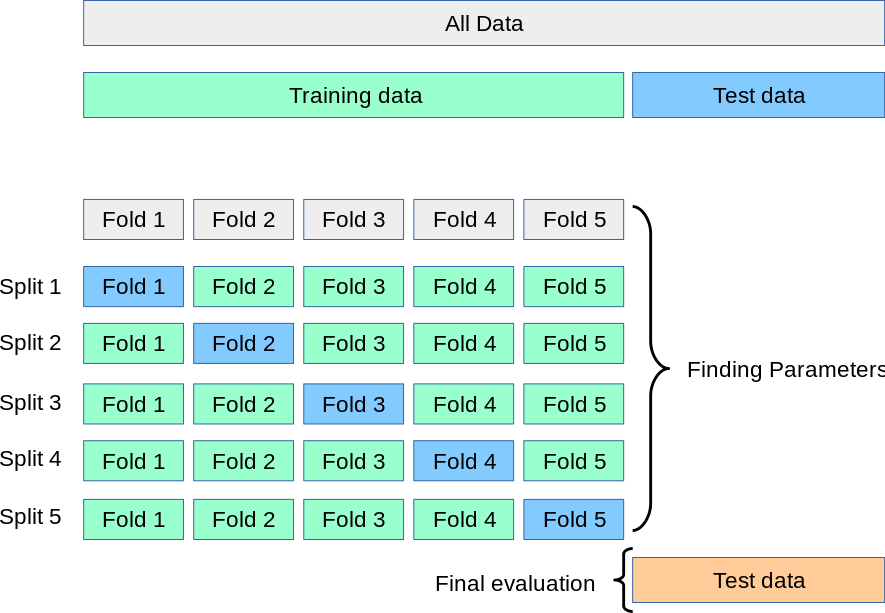

Fonte da imagem acima: [sklearn](https://scikit-learn.org/stable/modules/cross_validation.html).

Aqui vai uma explicação do esquema:

1. **Divisão dos dados em treino e teste;**

2. **Utilização da *cross-validation* nos dados de treino e com cada possível combinação de hiperparâmetros**, tentando atingir o melhor resultado (alguma das métricas de 8.5.2). Dessa forma conseguimos ter uma idéia de qual o melhor valor para se utilizar;

3. **Teste final com dados nunca vistos** (aqueles que foram divididos no processo 1).

> **->** E qual vai ser o **nosso** passo-a-passo?

Primeiramente quero ter mais certeza nos meus resultados, **diminuindo o fator de aleatoriedade**. Portanto, optarei por um *cross-validation* com o mesmo estimador que foi utilizado em 8.8.2, o **`RepeatedStratifiedKFold()`**.

Entretanto, usar este estimador vai ser computacionalmente custoso. Por este motivo, **não quero testar muitas possiblidades em cada hiperparâmetro**, assim o gasto de tempo tende a ser "menor" (ainda que bem demorado). É uma troca equivalente, no meu ponto de vista.

Em segundo lugar, **não vou seguir a figura!** O ideal é seguí-la, para termos um meio de validarmos o algoritmo com os melhores parâmetros no final. Contudo, há uma **quantidade extremamente baixa de linhas** no nosso *DataFrame*, e se fôssemos dividí-lo como o sugerido:



1.  A primeira vez para separar em treino (80%) e teste (20%);

2. A segunda para separar os dados de treinamento nos k *folds* e realizar o *cross-validation*, ou seja, temos $0.8 \times \frac{k-1}{k}$ do total de dados para treinar e $0.8 \times \frac{1}{k}$ para validar cada *fold*, em $n$ iterações diferentes (`RepeatedStratifiedKFold()`). 

Ficaríamos com um **treinamento muito ruim**, em **todas as iterações**!

A partir disso, vou optar por uma outra estratégia:

> Realizar **validações cruzadas** (`RepeatedStratifiedKFold()`, pegando a média no final), porém com **todos** os nossos dados disponíveis (X e y). O `GridSearchCV()` irá achar o modelo com os melhores parâmetros! Infelizmente não conseguiremos testá-lo no final, como a última figura sugere (o resultado é obvio, seria 100% de acerto), mas é o que temos no momento... No final, pegamos aquele que apresentar a melhor métrica!

> **->** Okay, mas qual vai ser a nossa métrica alvo?

> A resposta é simples, aquela que apresentou um **baixo desempenho** na seção passada e, além disso, é de **extrema importância para a nossa estratégia de negócio**: a ***recall***;

> **->** Quais os hiperparâmetros que vamos variar?

> - **`n_estimators`**: número de árvores de decisão na "floresta";

> - **`max_features`**: número máximo de *features* consideradas para dividir apenas um nó das árvores.

> **->** Por que estes?

> Pois mexer no **`n_estimators` é o que dá mais resultado na *Random Forest***, afinal, aumentamos ou diminuímos a nossa gama de árvores (possibilidades de criação) e, assim, impactando no resultado final do modelo. 

> Já se reduzirmos as **`max_features`** por nó, **poderemos encontrar muitas árvores que são bem diferentes das atuais**, modificando, até que bem, o nosso resultado final.

Sendo assim, vamos experimentar os seguintes valores:

- `n_estimators`: 200 até 2000, pulando de 200 em 200;

- `max_features`: de 1 a 7.

Estou querendo um **grande número de árvores** pois temos uma **enorme quantidade de *features*** (50 independentes), ou seja, muitas possibilidades de criação!

Além disso, na documentação da `sklearn`, a `max_features` tem valor igual a "`auto`", por padrão. Este significa que ele pega a raiz quadrada da quantidade de features (50), e assim, o máximo de variáveis por nó irá ser **7** (arredondando). A partir dessa informação, quis testar de baixo para cima essas quantidades máximas. Bom, vamos ver no que dá!

**Observações:** 

- Mais informações sobre os hiperparâmetros e seus valores na documentação da biblioteca [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html);

- O número total de *recall*'s médios no final vai ser de $10 \times 7 = 70$ (**10** `n_estimators` e **7** `max_features`).

In [ ]:
# Setando os parâmetros que iremos utilizar
n_estimators = np.arange(200, 2200, 200)
max_features = np.arange(1, 8, 1)

param_grid = params_rf = {'n_estimators' : n_estimators,
                          'max_features' : max_features}

# Definindo o cross-validation que eu quero
cv = RepeatedStratifiedKFold(5, 10)

# Instanciando o GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv,
                    scoring='recall', n_jobs=-1)

In [ ]:
# Aproximadamente 1h e meia para rodar esta célula! CUIDADO!

# Aplicando a validação e descobrindo quais são
# os melhores valores para os nossos hiperparâmetros

grid.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_s...
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                      

In [ ]:
print('Os parâmetros selecionados pelo GridSearchCV foram:\n')
print(grid.best_params_)

Os parâmetros selecionados pelo GridSearchCV foram:

{'max_features': 7, 'n_estimators': 2000}


In [ ]:
print(f'Nice! Conseguimos aumentar um pouco o nosso recall médio. Fomos para: {grid.best_score_}.')

Nice! Conseguimos aumentar um pouco o nosso recall médio. Fomos para: 0.6998106060606061.


In [ ]:
# Vamos guardar o nosso melhor modelo em uma variável
best_model = grid.best_estimator_

TOP! Temos o nosso `grid` e a *Random Forest* otimizada!

Então... acabamos? Eu diria que quase. Vamos apenas ver algumas visualizações a mais, nada que seja de extrema necessidade, pois já temos o nosso modelo construído, mas é legal entender um pouco mais a respeito dele.

### **8.11. Countor Plots 2D e 3D**

Vamos ver como os valores dos hiperparâmetros testados, junto do *recall*, ficam em ***countor plots***, 2D e 3D (biblioteca `plotly`). Melhor do que eu ficar explicando o que é esse tipo de gráfico, vou mostrá-lo na prática.

Mas antes, tenho que fazer algumas manipulações de dados...

In [ ]:
# Transformando os nossos scores em um DataFrame
score_df = pd.DataFrame(grid.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.501051      0.010478  ...        0.094224               68
1       1.001385      0.014531  ...        0.080739               67
2       1.519072      0.022996  ...        0.087120               70
3       2.017229      0.020120  ...        0.101335               61
4       2.519035      0.029014  ...        0.082776               64

[5 rows x 60 columns]

In [ ]:
# Pegando somente as variáveis que eu quero
wanted_results = score_df.copy()[['param_max_features', 
                                  'param_n_estimators', 
                                  'mean_test_score']]

# Renomeando a coluna para deixar mais intuitivo                              
wanted_results.rename({'mean_test_score' : 'recall',
                       'param_n_estimators' : 'n_estimators',
                       'param_max_features' : 'max_features'}, 
                      axis=1, inplace=True)

In [ ]:
display(wanted_results)

max_features n_estimators    recall
0             1          200  0.612519
1             1          400  0.612652
2             1          600  0.605303
3             1          800  0.620644
4             1         1000  0.615208
..          ...          ...       ...
65            7         1200  0.690076
66            7         1400  0.698674
67            7         1600  0.698617
68            7         1800  0.692500
69            7         2000  0.699811

[70 rows x 3 columns]

In [ ]:
# Transformando em uma tabela cruzada
grid_pivot = wanted_results.pivot(index='max_features', 
                                  columns='n_estimators')
display(grid_pivot)

recall                      ...                              
n_estimators      200       400       600   ...      1600      1800      2000
max_features                                ...                              
1             0.612519  0.612652  0.605303  ...  0.617614  0.615189  0.610284
2             0.653864  0.649432  0.658049  ...  0.653826  0.656799  0.654318
3             0.657992  0.664773  0.657992  ...  0.672235  0.667197  0.668542
4             0.671534  0.677140  0.686250  ...  0.679621  0.679583  0.682670
5             0.680758  0.682614  0.688655  ...  0.689943  0.688163  0.690663
6             0.685019  0.685152  0.697292  ...  0.693693  0.690000  0.693674
7             0.688087  0.697386  0.691212  ...  0.698617  0.692500  0.699811

[7 rows x 10 columns]

In [ ]:
# Definindo as coordenadas
x_coord = grid_pivot.columns.levels[1].values
y_coord = grid_pivot.index.values
z_coord = grid_pivot.values

In [ ]:
# Countor plot 2D
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z_coord, 
                                   x=x_coord, 
                                   y=y_coord)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

*Voilà*! acima temos o nosso *countor plot* 2D. Basicamente, para os amantes de Cálculo, temos a nossa superfície plotada em 2 dimensões!

E como fica essa superfície em 3D?

In [ ]:
fig = go.Figure(data= [go.Surface(z=z_coord, 
                                  y=y_coord, 
                                  x=x_coord)], layout=layout)
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='recall'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

Bem legal este gráfico não é mesmo? Ele é uma representação visual de todos os valores dos hiperparâmetros utilizados, em relação ao *recall*. Quanto mais amarelo, ou seja, quanto mais alto estiver na figura, melhor é o *score*!

**Observação:** a idéia para *plotar* este gráfico foi [desse vídeo](https://www.youtube.com/watch?v=jUxhUgkKAjE).

### **8.12. Feature Importances**

Para finalizar, quero observar suas ***feature importances***.

Como o próprio nome em inglês diz, este conceito está relacionado com a importância que as variáveis possuem neste algoritmo. Esta é calculada através da **média dos coeficientes de Gini em cada *Decision Tree* de nossa floresta**. Se quiser saber como este coeficiente é calculado, deixei uma explicação breve na seção 8.4.3.

In [ ]:
# Criando o DataFrame com as features e seus scores
features = final_df.iloc[:, :-1].columns
scores = best_model.feature_importances_

feature_scores = {'Feature' : features,
                  'Score' : scores}

feature_scores = pd.DataFrame(feature_scores)
feature_scores.sort_values('Score', ascending=False, 
                           ignore_index=True, inplace=True)
feature_scores.head()

Feature     Score
0                 PCR_MEAN  0.075135
1  NEUTROPHILES/LINFOCITOS  0.071305
2     RESPIRATORY_RATE_MAX  0.062768
3                UREA_MEAN  0.059627
4           CREATININ_MEAN  0.044907

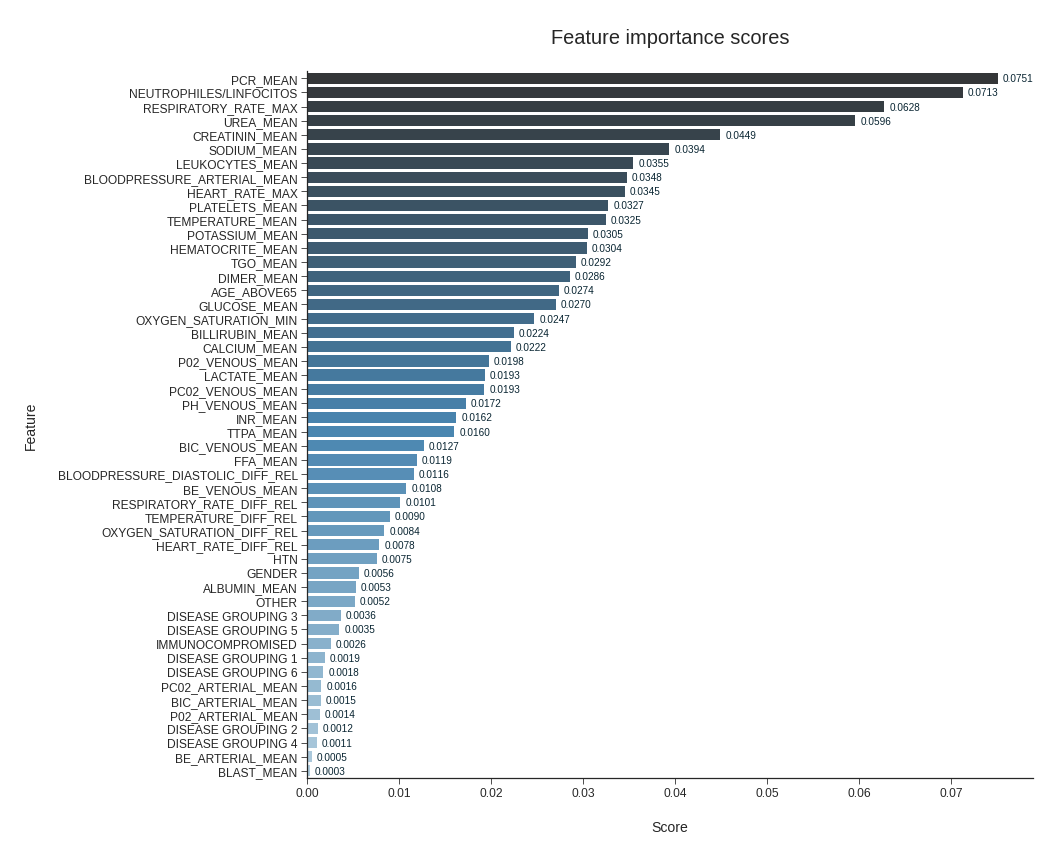

In [ ]:
show_barplot(x='Score', y='Feature', df=feature_scores,
             title='Feature importance scores')

Algumas **possíveis explicações** das feature importances mais altas (as interpretei e copiei alguns textos das fontes):

- **`PCR_MEAN`**: "O teste de PCR-RT ("reação de transcriptase reversa seguida de reação em cadeia da polimerase") é um exame que atua detectando o **material genético do vírus**. Ele apresenta resultados confiáveis, sendo o exame de escolha para **doentes que estejam com sintomas compatíveis com covid-19**". **Obs:** Não consegui achar alguma informação relacionada a admissão de UTI e este teste;

- **`NEUTROPHILES/LINFOCITOS`**: "a NLR (*Neutrophiles/Linfocitos Rate*) é um fator de risco independente para mortalidade intra-hospitalar, especialmente em **homens**, para os quais o **risco de mortalidade aumenta em 10% para cada acréscimo de unidade da NLR**. É importante considerar que esse estudo apresenta limitações importantes, no entanto, a NLR pode ser uma ferramenta útil para estimar a **morbimortalidade de pacientes com COVID-19**";

- **`UREA_MEAN`** e **`CREATININ_MEAN`**: "**Insuficiência renal aguda (IRA)** é uma condição caracterizada por um **declínio na taxa de filtração glomerular (TFG)** durante um período temporal curto (horas a dias). A apresentação geralmente consiste em um **aumento da concentração de creatinina** sérica e, em alguns casos, oligúria ou anúria. Utilizando a definição da KDIGO (*Kidney Disease: Improving Global Outcomes*), a IRA pode se manifestar como alterações apenas na **creatinina sérica** (12% dos pacientes), apenas na **produção de urina** (38%) ou em **ambas** (50%). Pacientes portadores de COVID-19 apresentam **alta mortalidade** especialmente quando apresentam IRA, situação que se destaca em **pacientes internados em UTI**;

- **`SODIUM_MEAN`**: “Um estudo da *Journal of Clinical Endocrinology & Metabolism da Endocrine Society* mostrou que, pela primeira vez, pacientes com Covid-19 e **baixo teor de sódio têm duas vezes mais probabilidade de precisar de intubação ou outros meios de suporte respiratório avançado do que aqueles com sódio normal**.”

- **`RESPIRATORY_RATE_MAX`**: A COVID-19 infecta o sistema respiratório, podendo causar **dispnéia** (dificuldade de respiração). Sendo assim, provavelmente esta variável está relacionada a este fato;

Para acessar as fontes e obter mais informações a respeito, vou deixar os links abaixo:

- [Teste PCR](https://www.coronavirus.saude.mg.gov.br/blog/70-pcr-rt-para-coronavirus);

- [NLR](https://www.einstein.br/Documentos%20Compartilhados/Neutrofilo_Linfocito-Ratio_Mortalidade.pdf);

- [Artigo sobre a IRA](http://www.rbac.org.br/artigos/insuficiencia-renal-aguda-em-pacientes-com-covid-19/);

- [Dificuldades para respirar](https://gooutside.com.br/quando-a-falta-de-ar-e-um-sintoma-de-covid-19/);

- [Média de sódio no sangue](http://www.sertao24horas.com.br/2021/02/27/covid-19-niveis-anormais-de-sodio-no-sangue-apontam-riscos-para-internados/).

### **8.13. Salvando algumas informações**

Pensando em um futuro uso do meu modelo, ou seja, com o objetivo de colocá-lo em produção, vou salvá-lo, além de deixar os parâmetros listados!

In [ ]:
# Código para salvar o modelo final, com o pickle
ml_final_model = "ml_final_model.pkl"
with open(ml_final_model, 'wb') as file:
    pickle.dump(best_model, file)

**Observação:** este arquivo ficará salvo no **diretório deste Colab**.

In [ ]:
'''
# Código para abrir o modelo, com o pickle
with open(ml_final_model, 'rb') as file:
    model = pickle.load(file)
'''

Pronto! Agora temos o melhor modelo salvo! Abaixo vão os melhores parâmetros para ele:

In [ ]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Observação:** Ainda existe a aleatoriedade (mesmo que pouca), ou seja, pode ser que saiam parâmetros diferentes, alterando assim o melhor modelo! Desse modo, preferi printar o melhor modelo e não colá-lo em uma célula de texto.

---
## **9. Resumo e Conclusão do Projeto**

Foi um projeto bem trabalhoso, principalmente pelo fato de que existiam **muitas variáveis** para serem tratadas... Porém, em um primeiro processamento:

- Conseguimos sair de 1925 linhas e 231 colunas para **352** linhas e **229** colunas.

Fizemos em seguida a análise exploratória de dados, descobrindo que:

- Os **dados eram bem balanceados**, ou seja, existiam quantidades próximas de pacientes que foram para a UTI e não foram;

- Sobre a idade:

  - Tivemos **mais pacientes abaixo de 65 anos** (191 pessoas) no *Dataset*;

  - Das pessoas que são **acima de 65 anos**, existe uma **quantidade maior das que foram para a UTI** (100 pessoas);

  - Das pessoas que são **abaixo de 65 anos**, aproximadamente o **dobro não foi para a UTI** (128 pessoas);

  - O **maior número de pacientes** que foram para o hospital estão em um **percentil de 20 anos** (42 pessoas);

  - Pode-se notar uma **tendência crescente no número de ocorrências de UTI, conforme se aumenta a idade**;

  - Da mesma forma o oposto acontece, ou seja, a **tendência é decrescente no número de pessoas que não foram para a UTI, conforme se aumenta a idade**.

- Sobre o gênero:

  - Existem **muito mais homens hospitalizados** no *Dataset* (218 homens e 114 mulheres, quase o dobro);

  - Tivemos **mais homens sendo internados na UTI** (111 pessoas), **comparado com as mulheres** (52 pessoas);

  - **Dos homens, temos pouca diferença entre os que vão para a UTI ou não**, são quantidades praticamente iguais;

  - **Das mulheres, podemos notar que uma quantidade maior de pessoas não foram para a UTI** (82 pessoas).

- Sobre as doenças:

  - **Em quase todas as visualizações de doença, a maioria das pessoas não as tiveram**, com **excessão de `OTHER`**;

  - **Dos que tiveram as doenças, em quase todos os gráficos tivemos um maior número de pacientes indo para a UTI, apenas não aconteceu em `DISEASE GROUPING 6` e `OTHER`**;

  - **Quando a pessoa estava com determinada doença, a `HTN` (depois de `OTHER`) foi a que teve mais casos de UTI, totalizando 44 pacientes**.

Depois de ver as variáveis qualitativas, partimos para ver as quantitativas. Entretanto, mais um problema apareceu, eram **MUITAS variáveis** e que, além disso, as distribuições de `MIN`, `MAX` e `MEDIAN` eram bem parecidas. Fora esse fato, a maioria das `DIFF`'s apresentavam valores únicos!

A solução foi retirar essas medidas que poderiam ser redundantes, tanto para a *EDA* quanto para nossos algoritmos de *ML*:

- Depois desse segundo pré-processamento, fomos de 229 colunas para **61**!

Após esta remoção, observamos as variáveis contínuas bem por cima, vimos suas **dispersões**, **médias**, **medianas** e **desvios padrões**. No final dessa etapa, plotamos uma **matriz de correlação** de forma mais intuitiva, com um **mapa de calor**.

Diminuímos ainda mais o nosso *DataFrame*, **retirando as variáveis altamente correlacionadas** e, para acabar com as *feature selections*, **juntamos com um *DataFrame* do Sírio-Libanês**. Resultado:

- De 61 features restantes, fomos para **51**!

Partimos então para a criação dos modelos de *Machine Learning*, e os selecionados para teste foram:

- *Naive-Bayes*;

- *Logistic Regression*;

- *Decision Tree Classifier*;

- *Random Forest Classifier*.

Analisamos todas as **médias das métricas** e seus **intervalos de confiança**, definidas/os a partir da ***cross-validation*** e o estimador **`RepeatedStratifiedKFold()`**. Enfim, escolhemos a ***Random Forest***, pois em quase todos os resultados ela se saiu melhor.

Após esta etapa, fizemos o ***tuning* de hiperparâmetros** em **todos os dados** que tínhamos, obtendo aumentar o ***recall***! A melhor seleção de parâmetros foram as seguintes:

In [ ]:
print(grid.best_params_)

{'max_features': 7, 'n_estimators': 2000}


In [ ]:
print(f'Conseguindo obter um recall médio de: {grid.best_score_}')

Conseguindo obter um recall médio de: 0.6998106060606061


E para terminar, vimos mais algumas visualizações a respeito do modelo: ***countor plots*** e as ***feature importances***. Enfim, o salvamos e finalmente acabamos o trabalho neste *notebook*!

Concluindo, foi muito legal trabalhar em cima de um problema real e que, recentemente (03/2021), vem sendo uma das maiores preocupações dos sistemas de saúde, principalmente porque o **número de leitos de UTI disponíveis, infelizmente, está diminuindo em muitos lugares do Brasil**...

É algo que precisamos resolver com **urgência**, pois se acabarem os equipamentos, um verdadeiro colapso pode se tornar realidade.

---
## **10. Agradecimentos**

**Meus sinceros agradecimentos a todos os envolvidos do Bootcamp da Alura (*Data Science* Aplicada)**, sinto que consegui me desenvolver bastante nesse período com vocês, além de que, até recebi mimos! :)

Agora, meus próximos passos envolvem muita dedicação e estudo, aprofundando, cada vez mais, meus conhecimentos na área de *Data Science*!

Mais uma vez, muito obrigado por tudo! <3